# MG 2장
## Introduction to Machine Learning with Python
<img src = "http://www.hanbit.co.kr/data/books/B6119391002_l.jpg", width="200">
## 지도 학습

### 분류와 회귀
- 분류 (중간 값이 없다)
: 이진 분류와 다중 분류
- 회귀 (중간 값이 나올 수 있다)
: 선형회귀와 로지스틱 회귀

#### 다루는 내용
- kNN 설명, k의 영향
- 유방암 데이터 설명
- 선형회귀 설명

In [4]:
%matplotlib inline
from preamble import *

### 일반화, 과대적합, 과소적합
- 기계학습의 모델: 일반화가 가장 중요함
- 일반화: 미래의 임의의 데이터에 대해서도 모델이 잘 동작하는 것
- 과대적합: 너무 상세하고 복잡한 모델을 만들어서 주어진 훈련데이터에만 과도하게 잘 동작하는 모델링
 - 모델이 복잡하여 주어진 데이터에 너무 맞추어져 있으면 과대적합이 된다
- 과소적합: 모델이 너무 간단하여 성능이 제대로 나오지 않는 모델링
 - 모델의 복잡도: 모델이 간단할수록 일반화는 유지하지만 정확도는 떨어진다 (과소적합)
 
#### 목표
- 일반화 성능이 최대화 되는 모델을 찾는 것

#### 해결책
- 주어진 훈련데이터에 다양성이 보장되어야 한다. 전체를 경우의 수나 특성을 골고루 나타낼 수 있어야 한다(representative).
- 일반적으로 데이터의 양이 많으면 일반화에 도움이 되지만 잘못된(편중된) 데이터를 많이 모으는 것은  오히려 도움이 되지 않는다

### 임의의 샘플 데이터 생성
- make_forge()로 임의의 x, y 데이터 샘플을 생성한다
- discrete_scatter()로 산점도를 그린다
- mglearn 패키지의 plot_helper, datasets.py, make_forge, make_blobs 등 참조

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
print("X.shape: {}".format(X.shape))

print(X,y)

X.shape: (26, 2)
[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


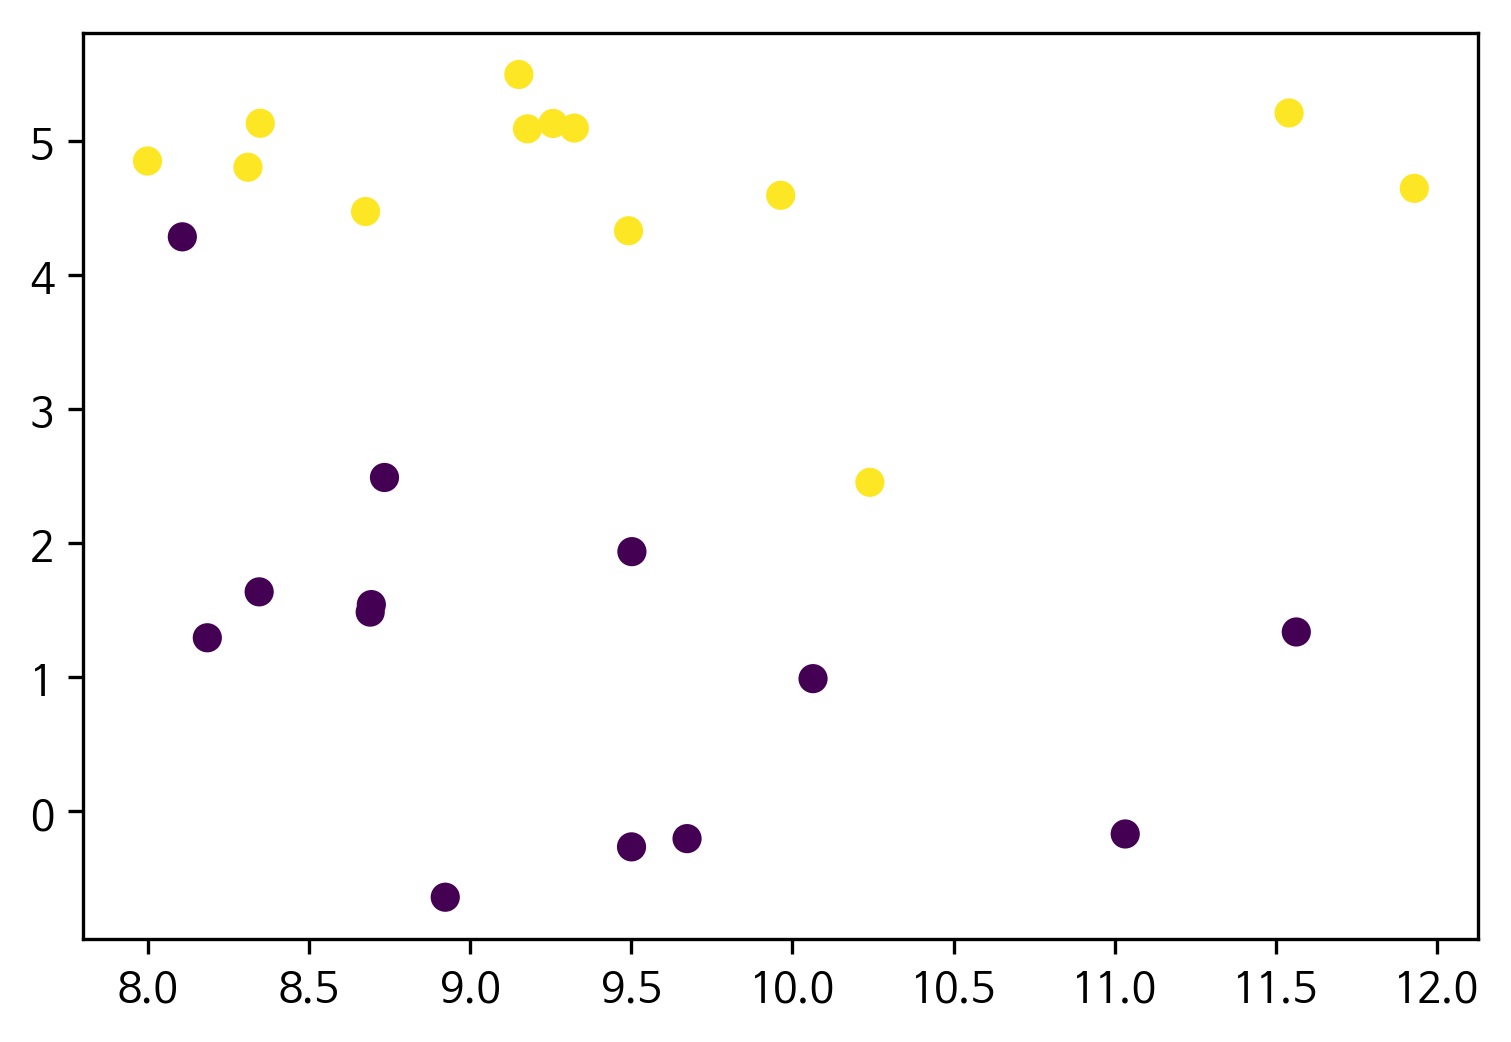

In [6]:
# 산점도를 그립니다 (기본 함수)
plt.scatter(X[:, 0], X[:, 1], c=y)

Text(0,0.5,'특성2')

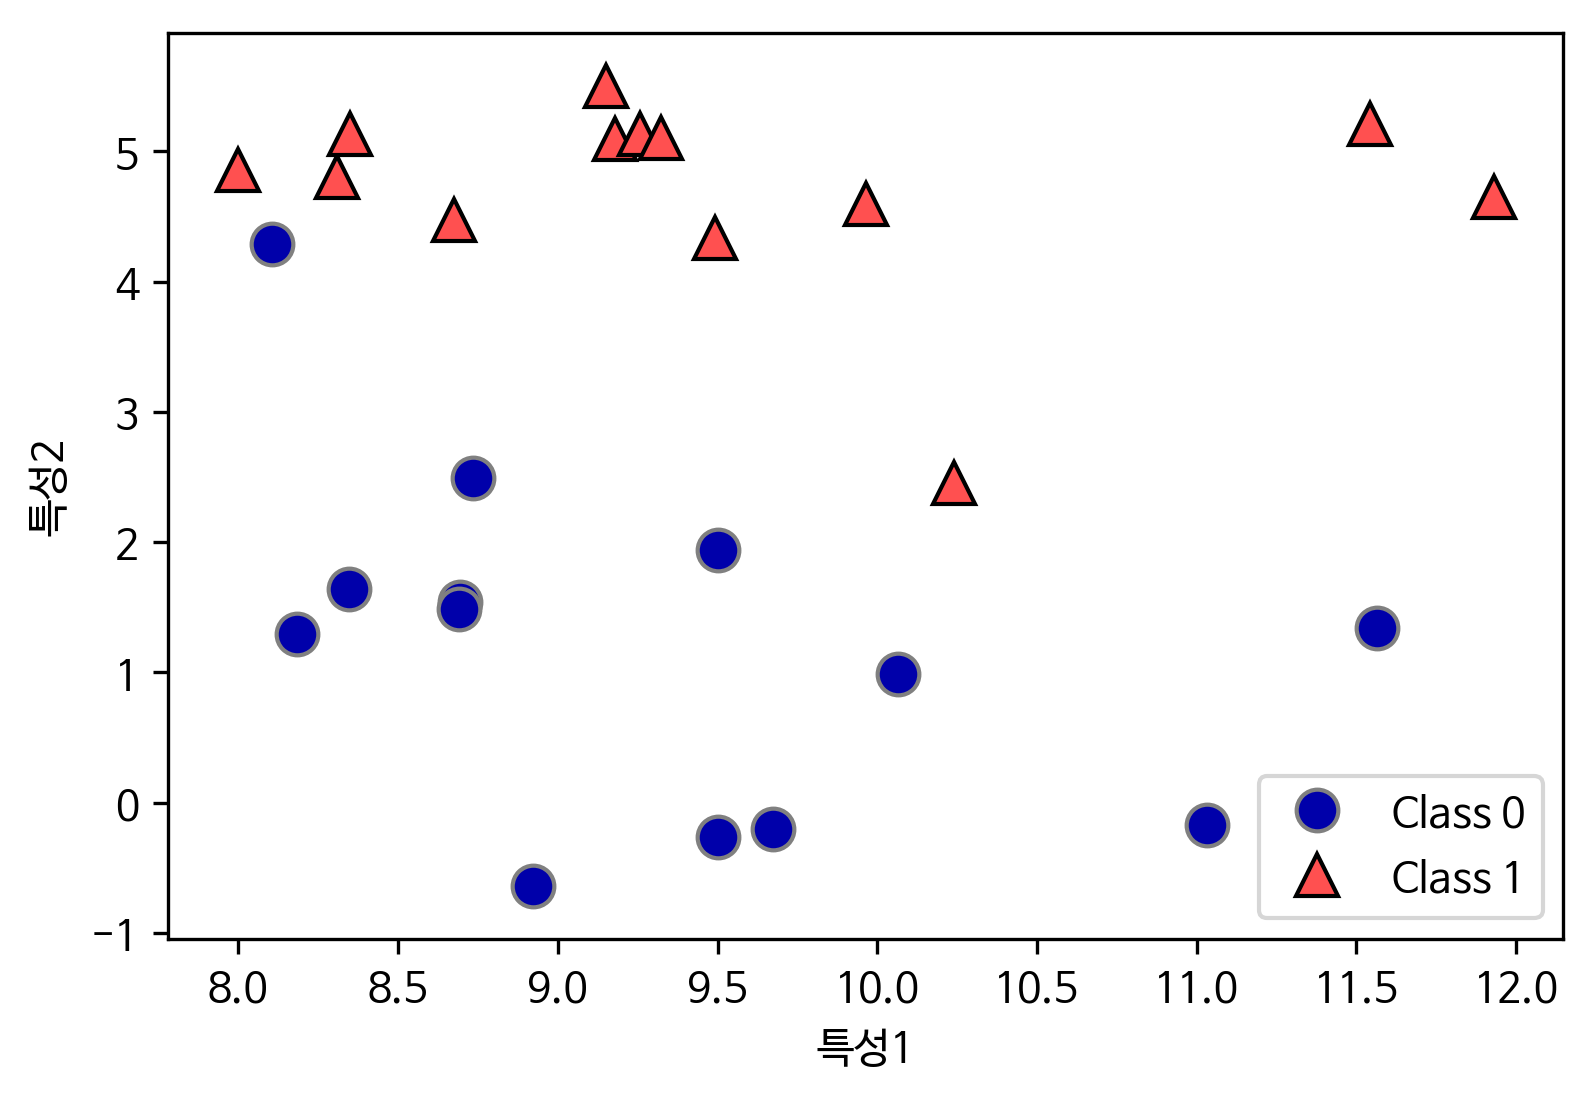

In [7]:
# mglearn 라이브러리를 사용한 (예쁜) 산점도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("특성1")
plt.ylabel("특성2")

Text(0,0.5,'Target')

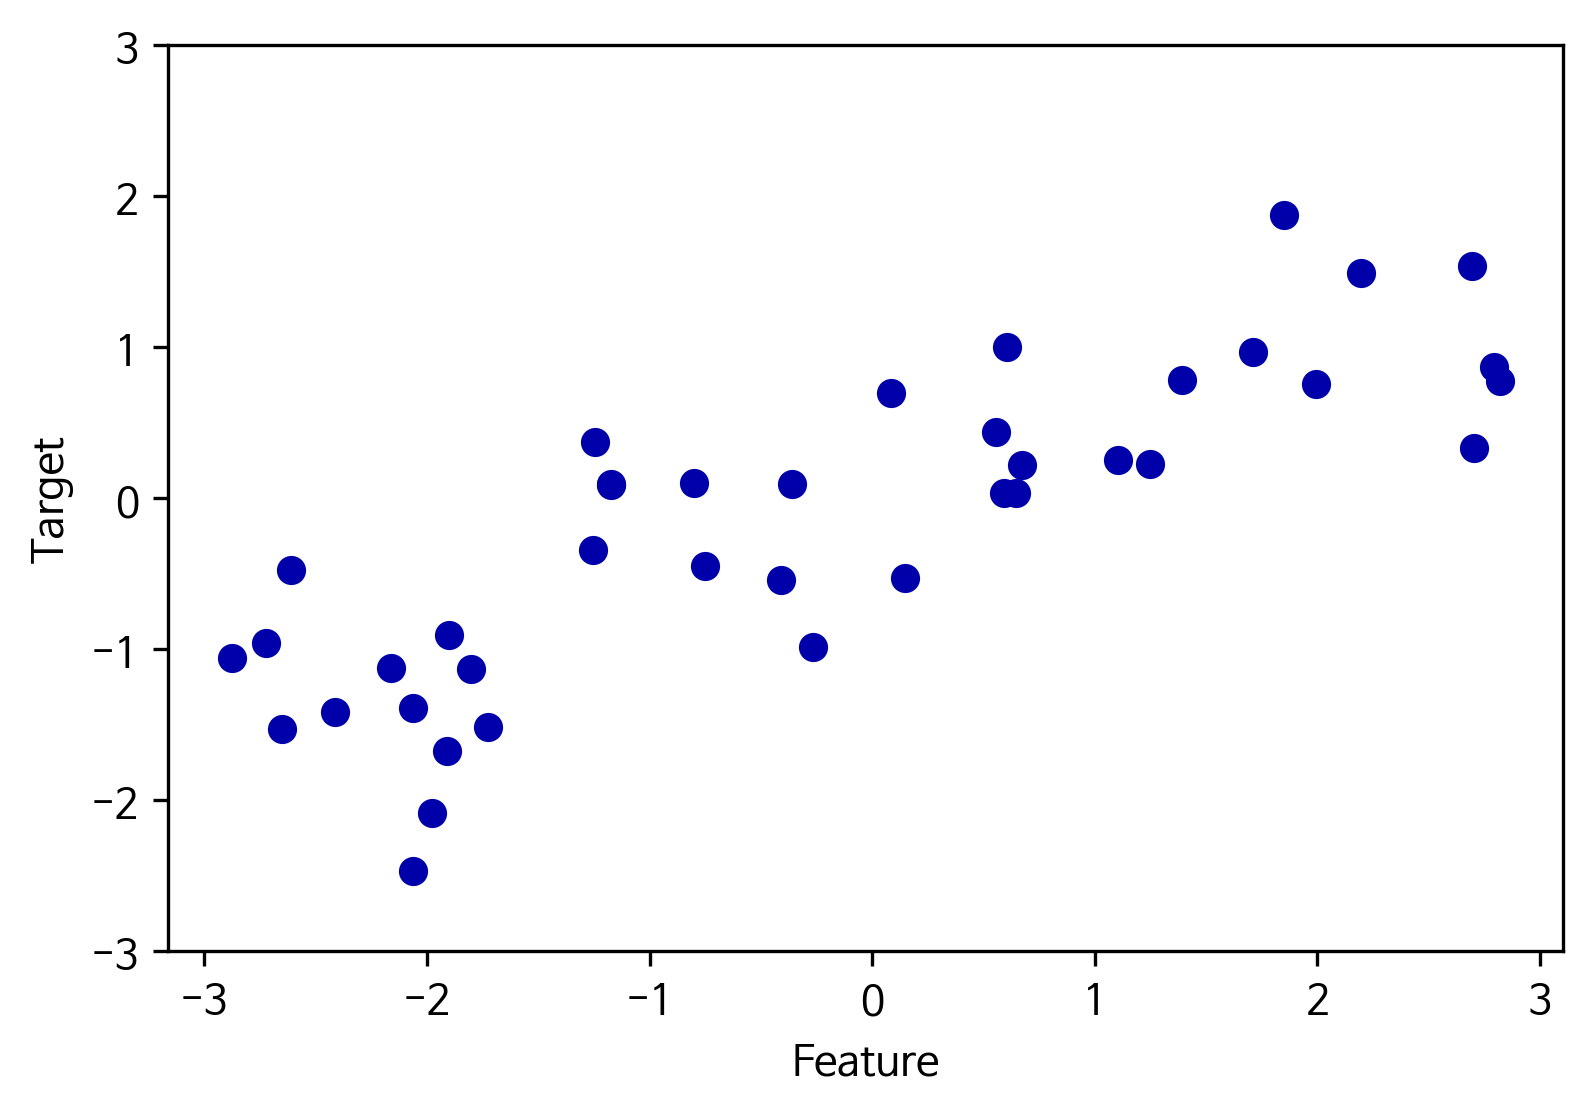

In [8]:
# 1차 선형 모델에 사용할 데이터 생성
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### 위스콘신대 유방암 데이터
- 양성(benign)과 악성(malignant)종양에 대한 피처 데이터를 제공
- load_breast_cancer() 함수로 로드한다 (Bunch 형태의 데이터 제공, Bunch 데이터는 '.' 으로 내부 데이터 접근이 가능하다)

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['DESCR', 'data', 'feature_names', 'target_names', 'target'])


In [10]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


- bincount()함수를 사용하여 타겟 변수의 구성을 알아본다

In [11]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'benign': 357, 'malignant': 212}


In [12]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### k-최근접 이웃
#### k-최근접 이웃 분류 - 훈련 데이터셋을 저장만 하는 것이 모델을 만드는 전 과정이다
- k=1일 때는, 가장 가까운 샘플로 분류하는 방식
- 아래 그림에서는 임의로 3개의 별표로 표시된 점을 나타냈고 가장 가까운 샘플을 연결했다

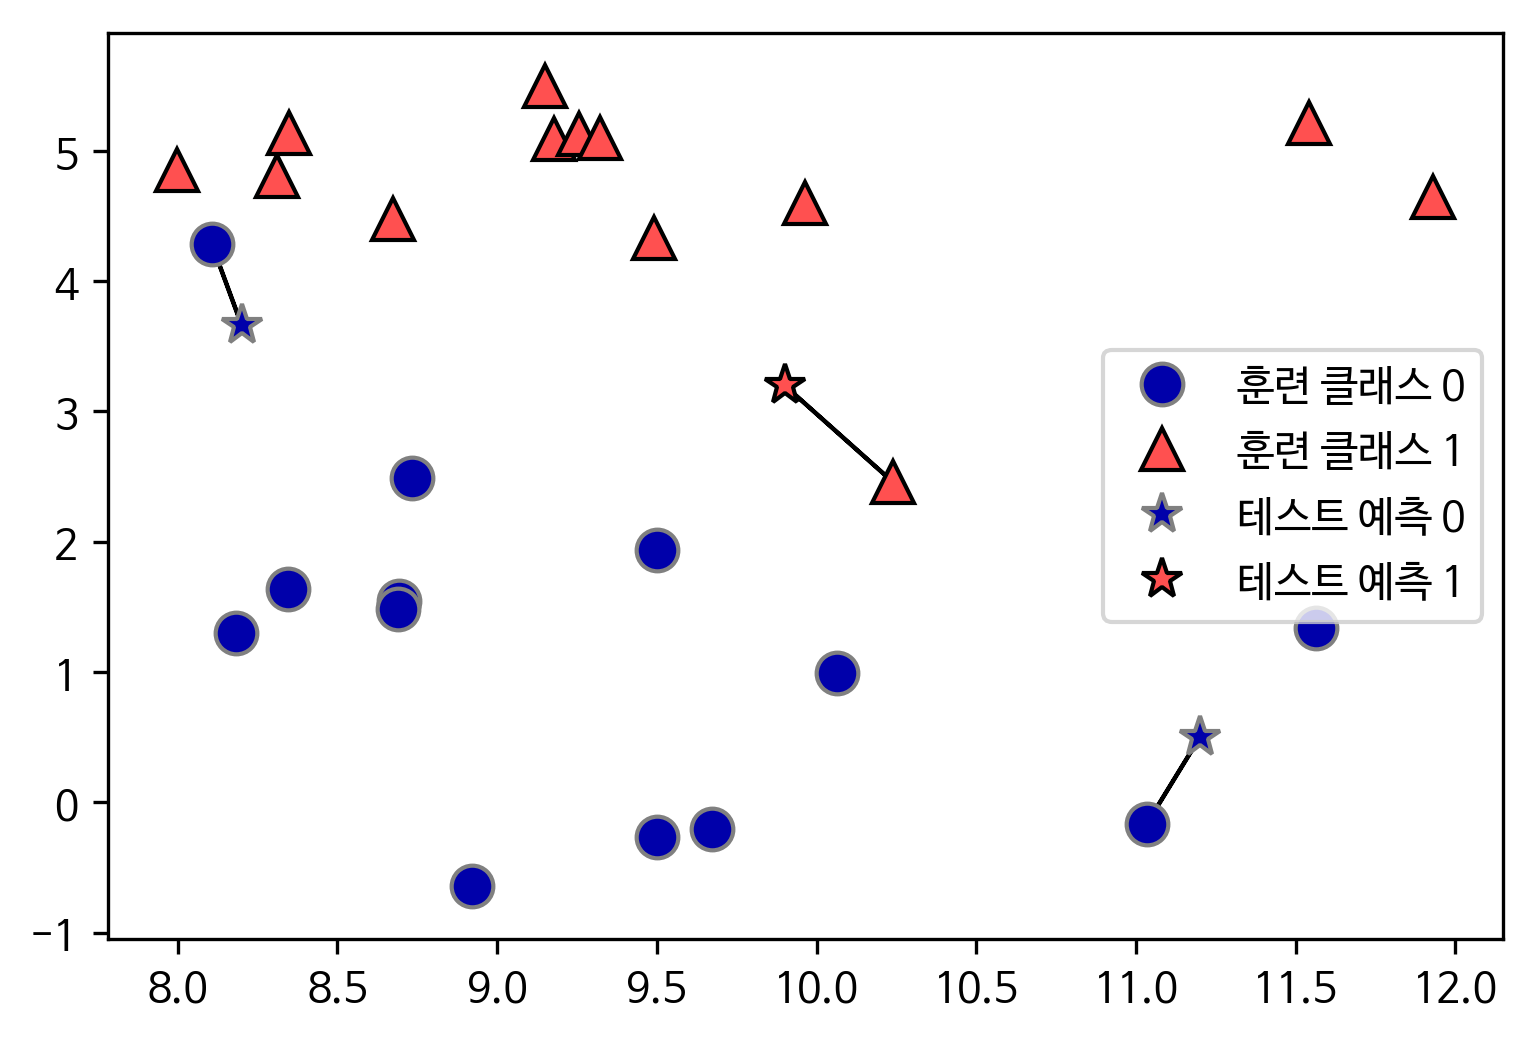

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- k=3일 때의 예를 들었다
- 결과를 보면 k=1일 때에 비하여 분류 결과가 달라진 것을 알 수 있다

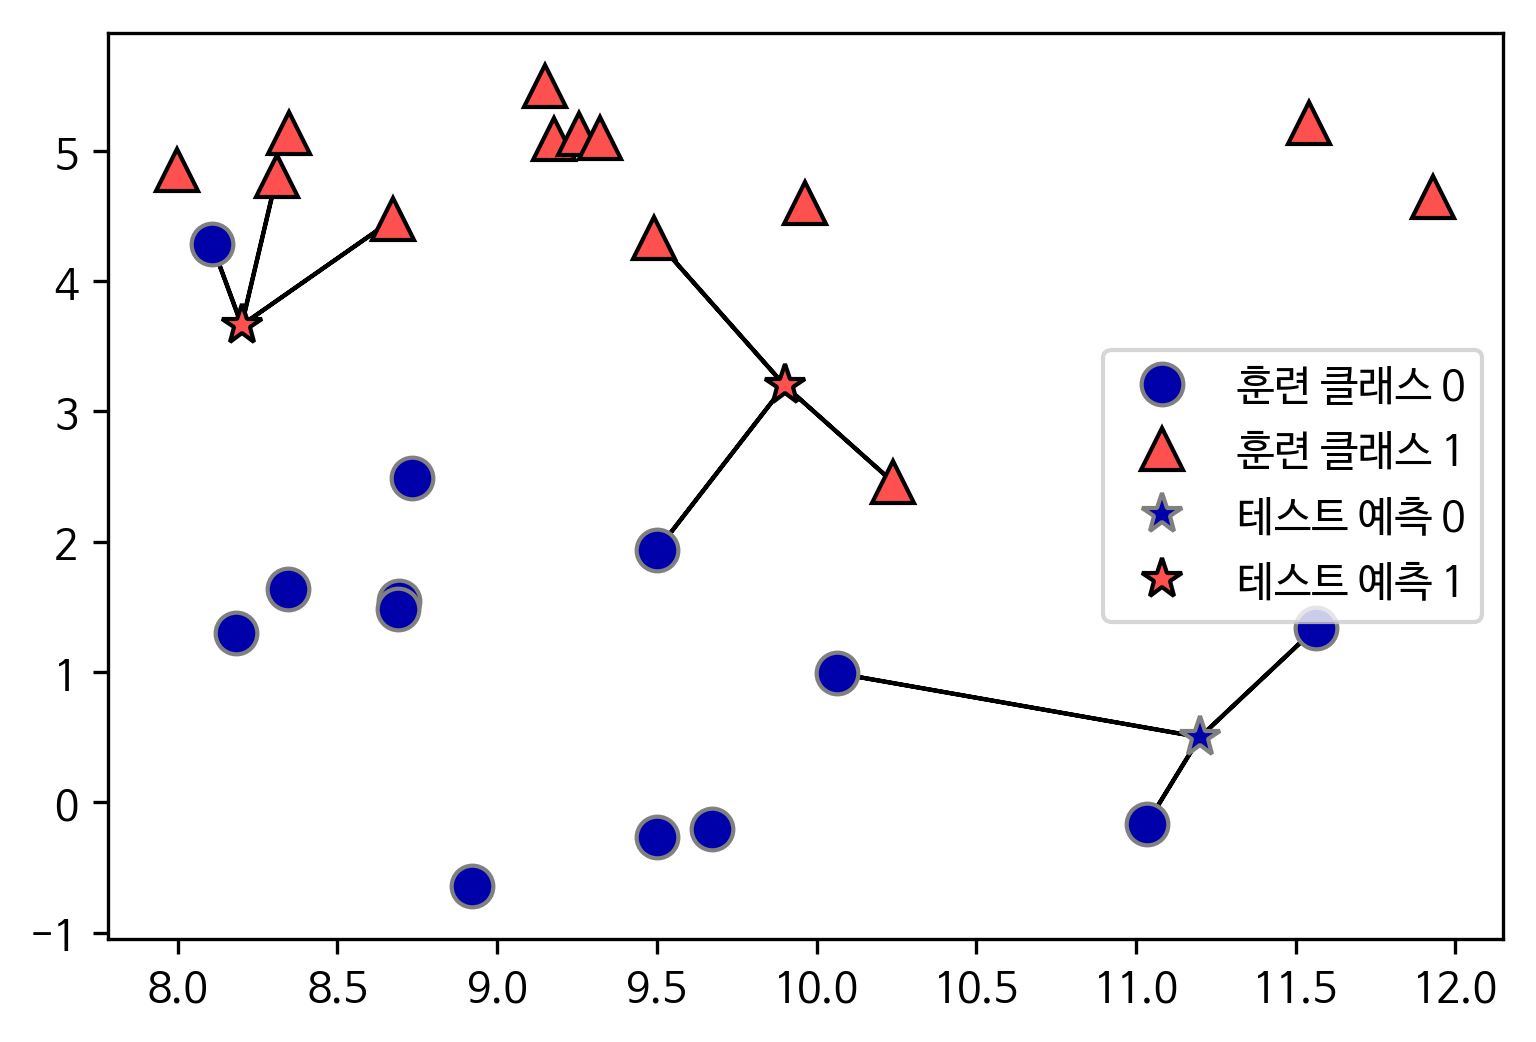

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### scikit-learn을 사용
- 훈련데이터와 테스트 데이터를 나눈다 (split)

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [17]:
print(X.shape)

(26, 2)


In [18]:
print(X_train.shape)

(19, 2)


In [19]:
print(X_test.shape)

(7, 2)


In [20]:
print(X_test)

[[ 7.998  4.853]
 [ 9.502  1.938]
 [11.542  5.211]
 [11.033 -0.168]
 [11.93   4.649]
 [11.564  1.339]
 [ 9.323  5.098]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)

 k = 1,2,...,  26  결과비교

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

- fit에서 학습하는 작업은 단순히 데이터를 저장하는 작업만 한다
- predict를 수행해보고, score를 사용해서 정밀도를 검증해본다

In [23]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 1]


In [24]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 1.00


#### KNeighborsClassifier 분석
- k 값의 변화에 따른 분류 경계의 변화

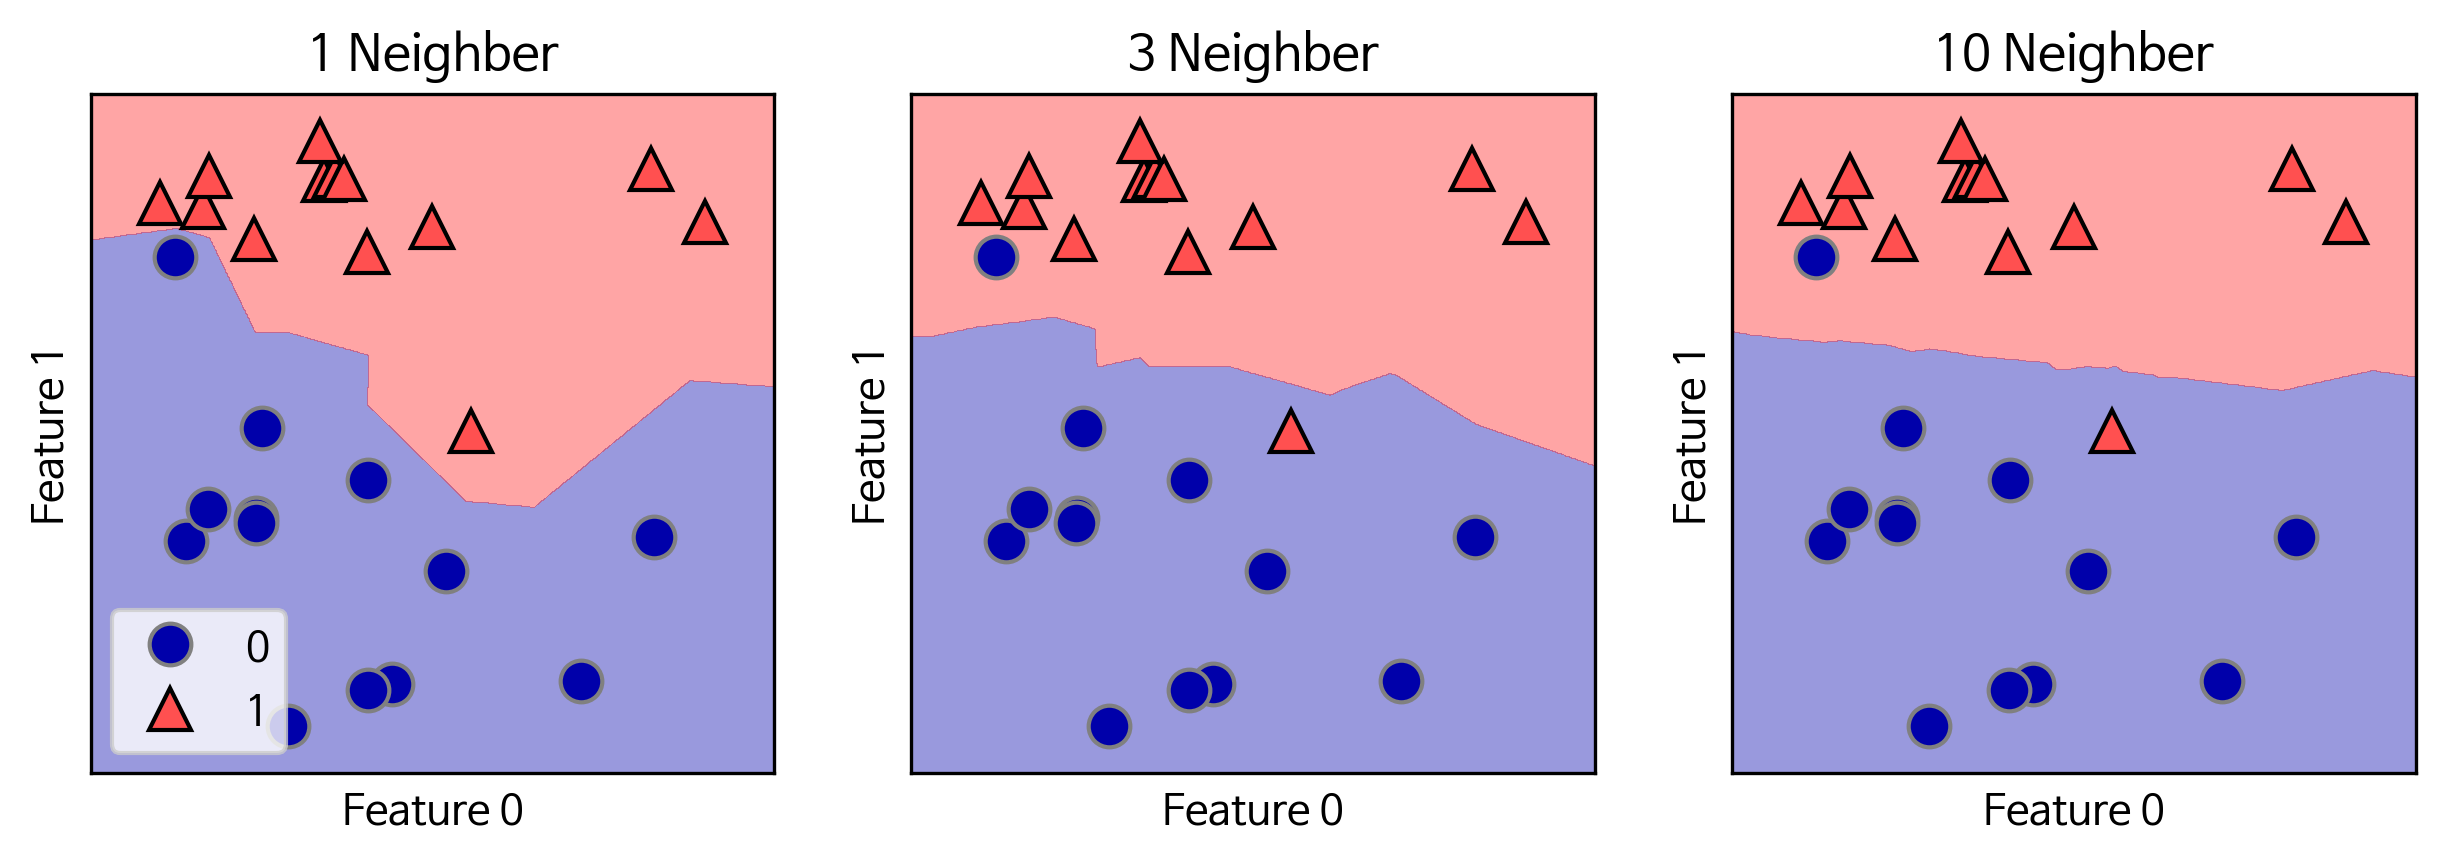

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 10], axes):
    # fit 메소드는 모델 객체를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighber".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
# k=1: 결정경계가 훈련데이터를 그대로 따른다
# k가 증가하면서 결정경계는 더 부드러워짐 (최종적으로는 평균치에 수렴한다)
# k=N (훈련데이터전체개수) 이상이면 평균치로 분류한다

### 유방암 데이터에 대한   kNN 적용
- k 값을 1~10까지 변경
- 훈련데이터 및 테스트데이터에 대한 정확도를 그려본다

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 100, 5)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장

    test_accuracy.append(clf.score(X_test, y_test))
    print(n_neighbors, clf.score(X_test, y_test))
    

1 0.9020979020979021
6 0.9370629370629371
11 0.916083916083916
16 0.9230769230769231
21 0.9230769230769231
26 0.9230769230769231
31 0.9230769230769231
36 0.9090909090909091
41 0.916083916083916
46 0.9090909090909091
51 0.9020979020979021
56 0.9020979020979021
61 0.9020979020979021
66 0.8951048951048951
71 0.9020979020979021
76 0.8951048951048951
81 0.9090909090909091
86 0.9090909090909091
91 0.916083916083916
96 0.9090909090909091


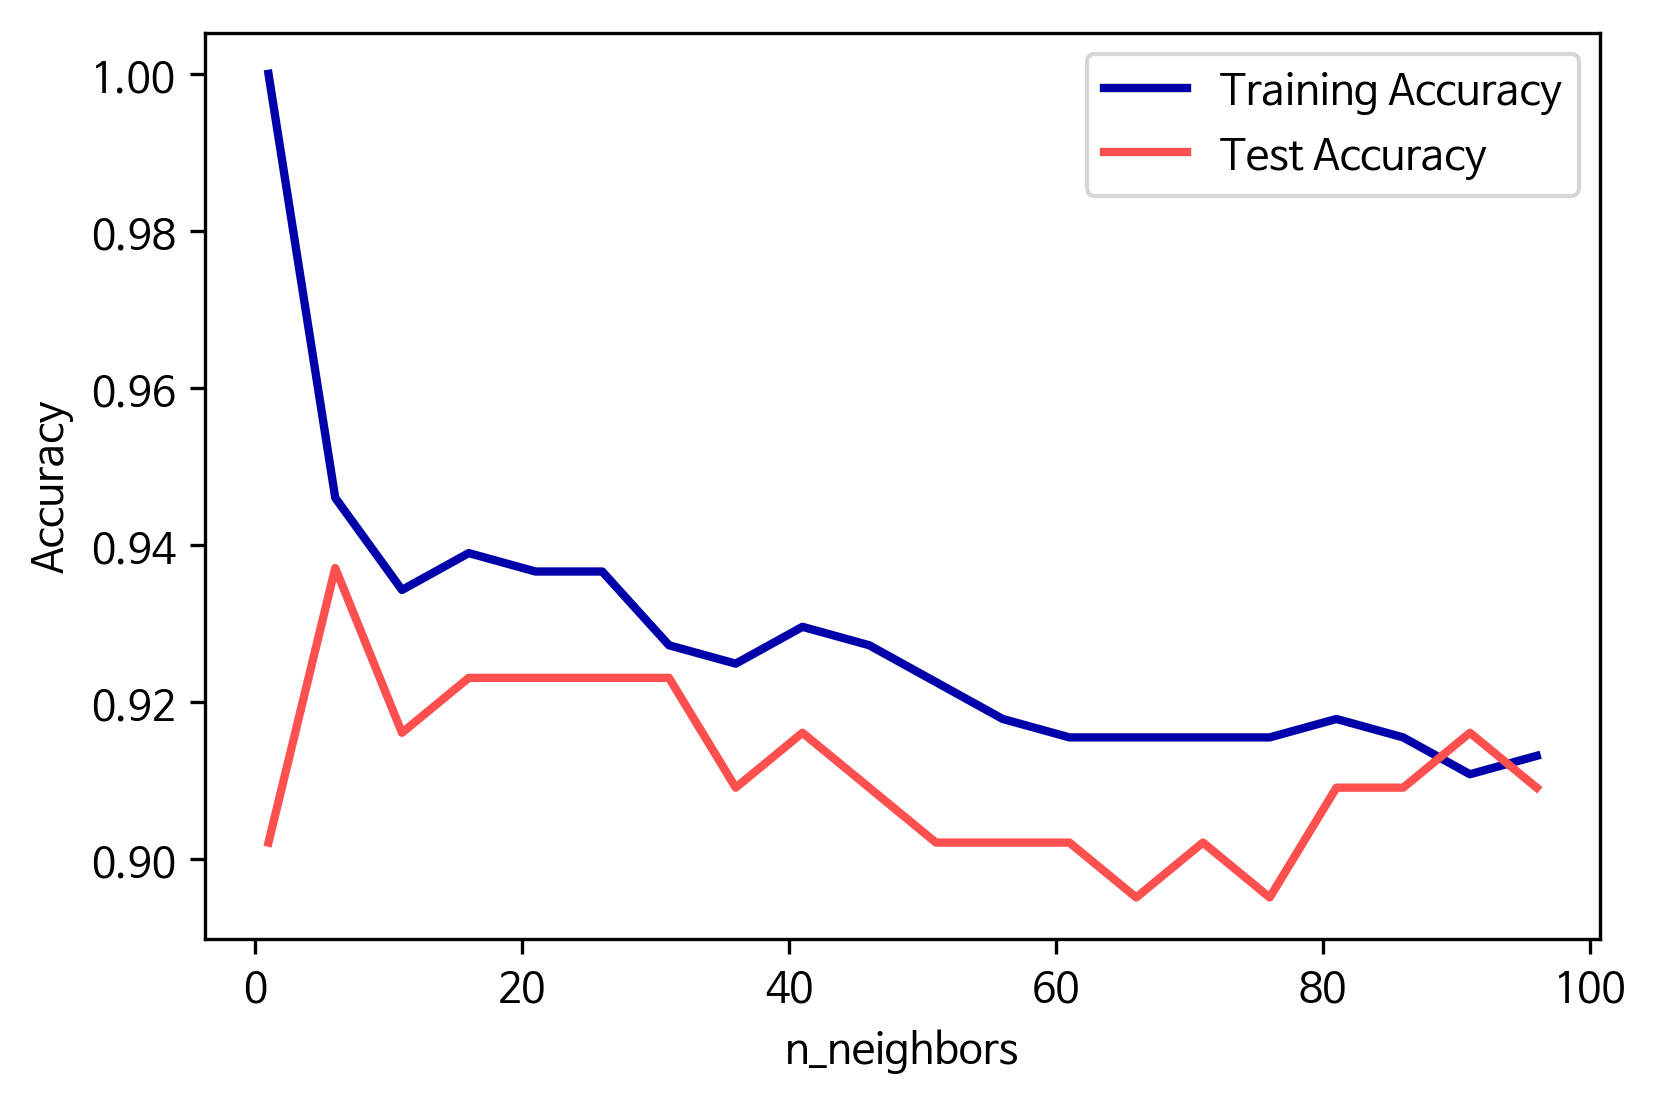

In [29]:
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#n_neighbor수에 따른 훈련세트와 테스트세트의 정확도를 보여줌

### k-NN을 분류가 아닌 회귀분석에 사용하는 예
- 분류알고리즘을 회귀분석에도 사용할 수 있다
- 가까운 점들로부터 예측한 값의 평균을 구하는 방식
- 단순 평균을 구하기도 하고(uniform), 거리에 비례한 가중치 평균을 구하기도 한다(distance)

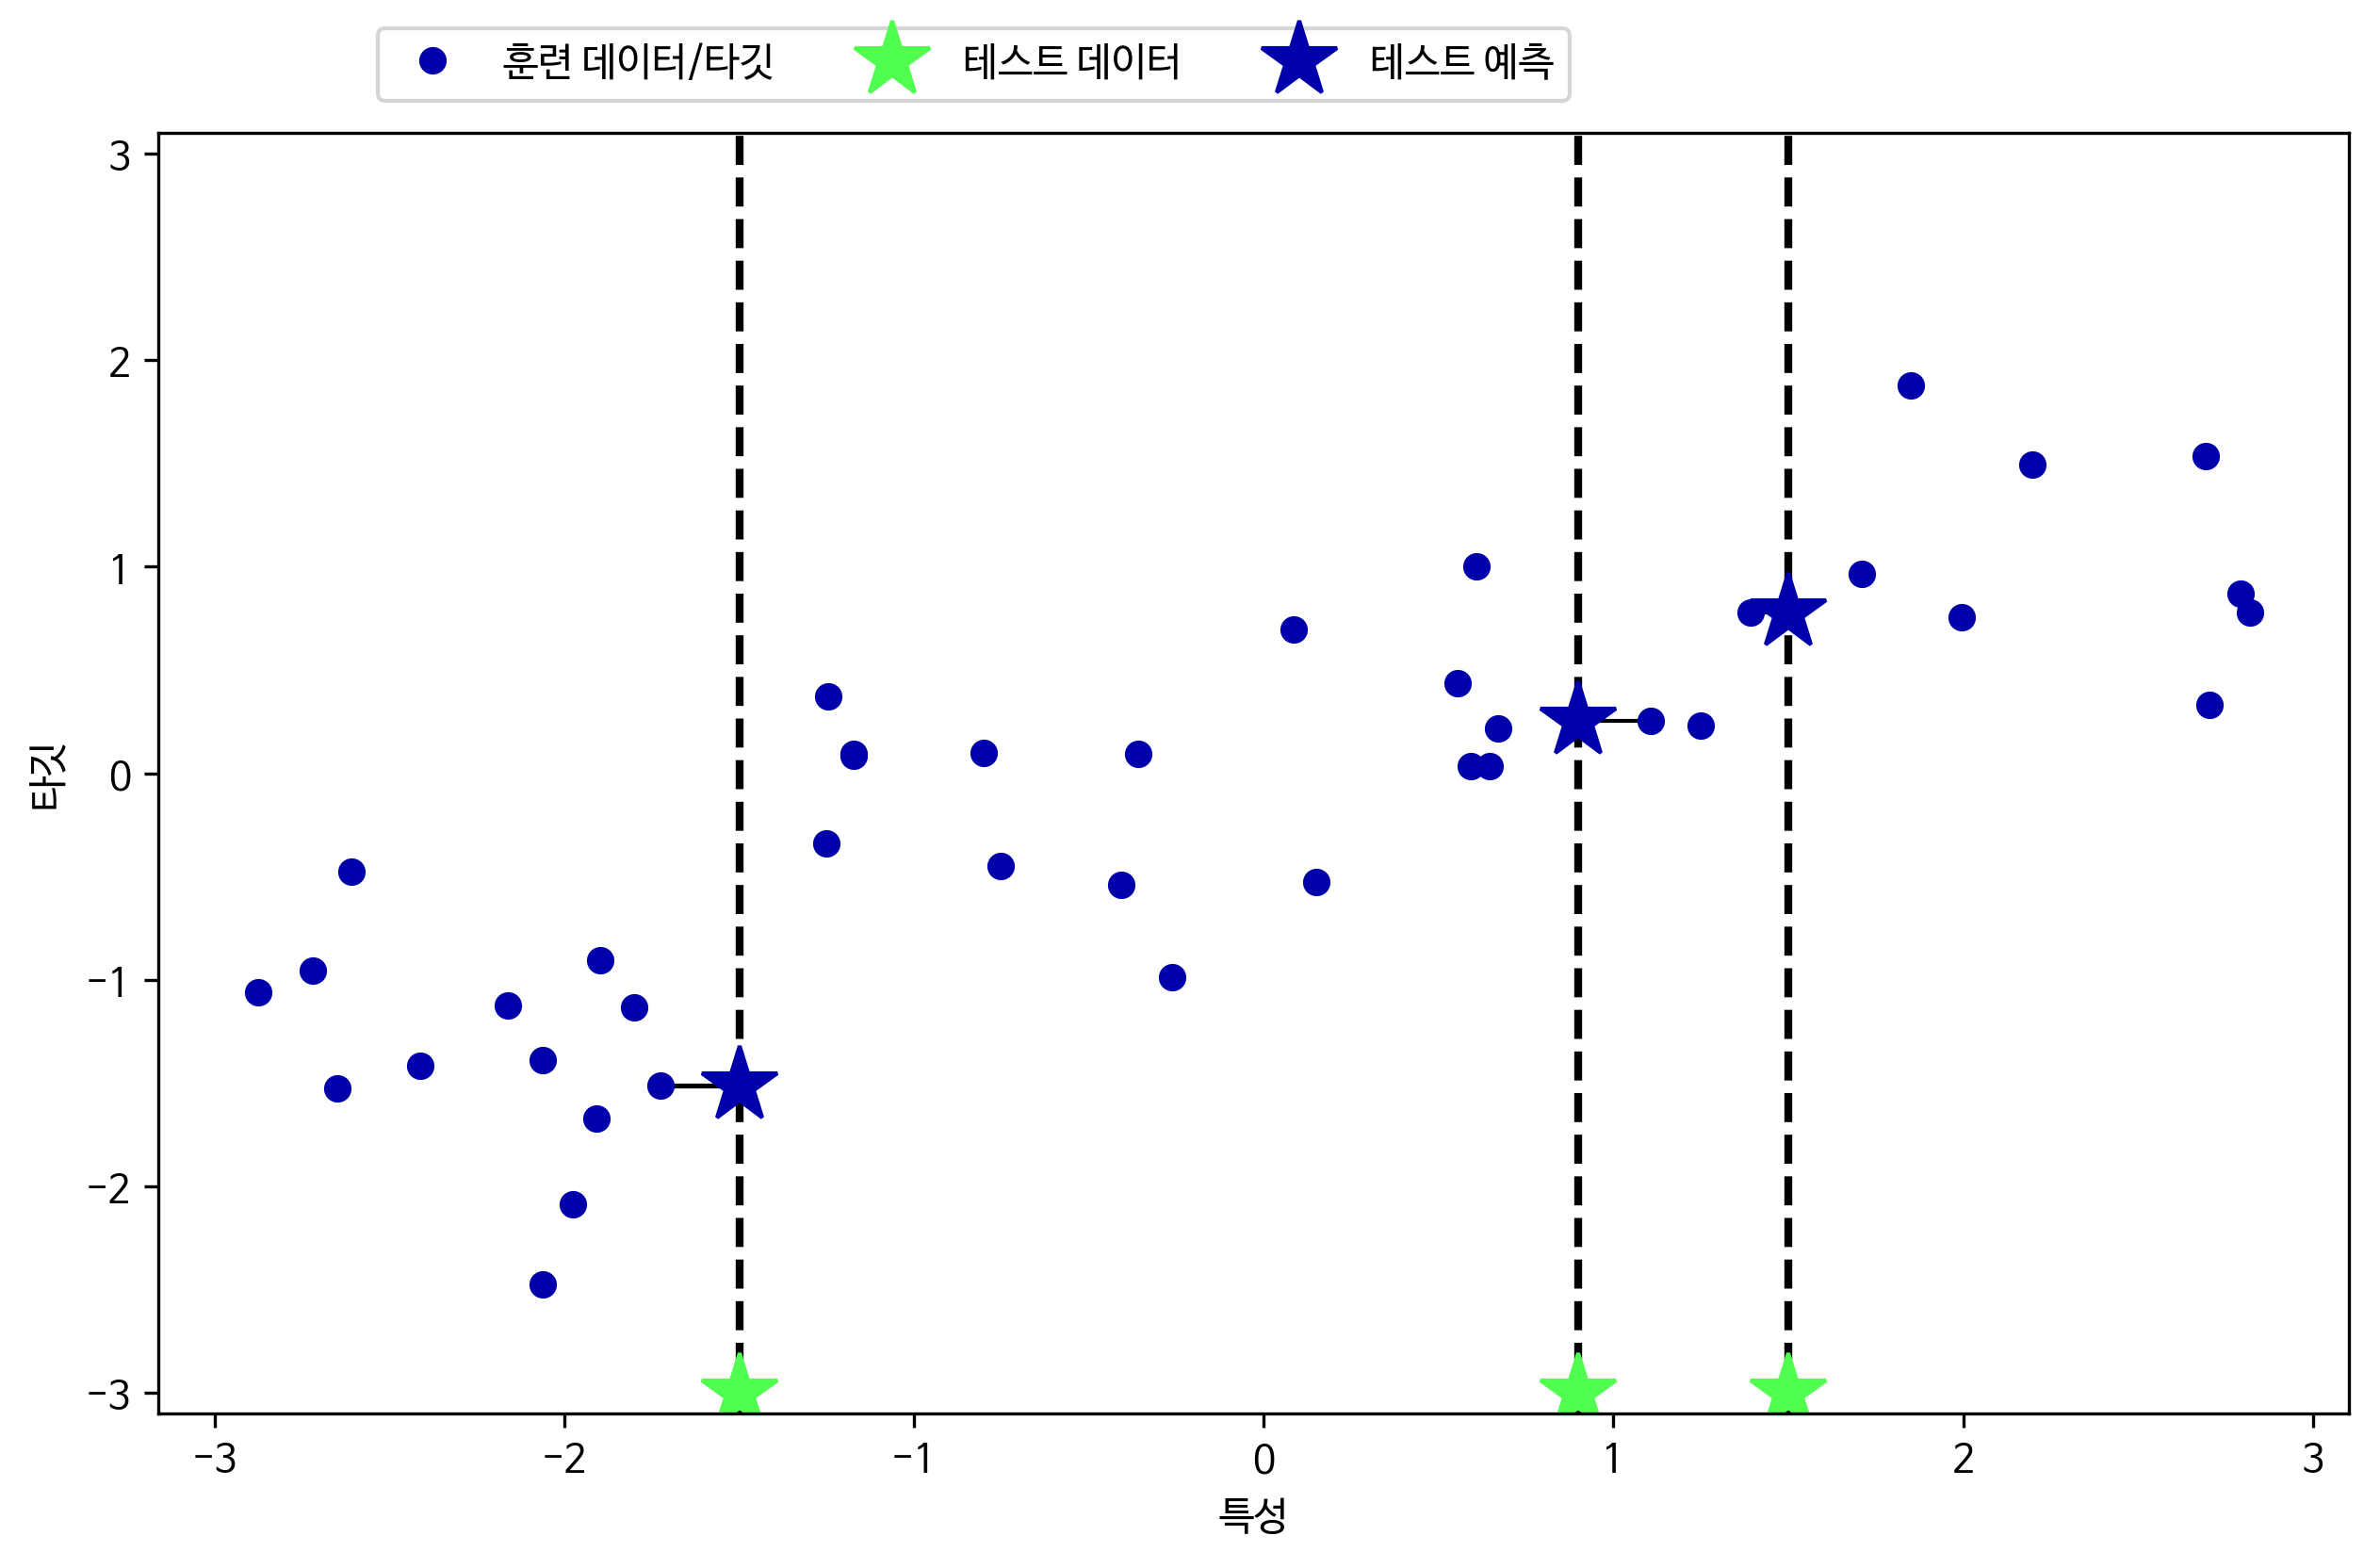

In [30]:
# 개념도
mglearn.plots.plot_knn_regression(n_neighbors=1)

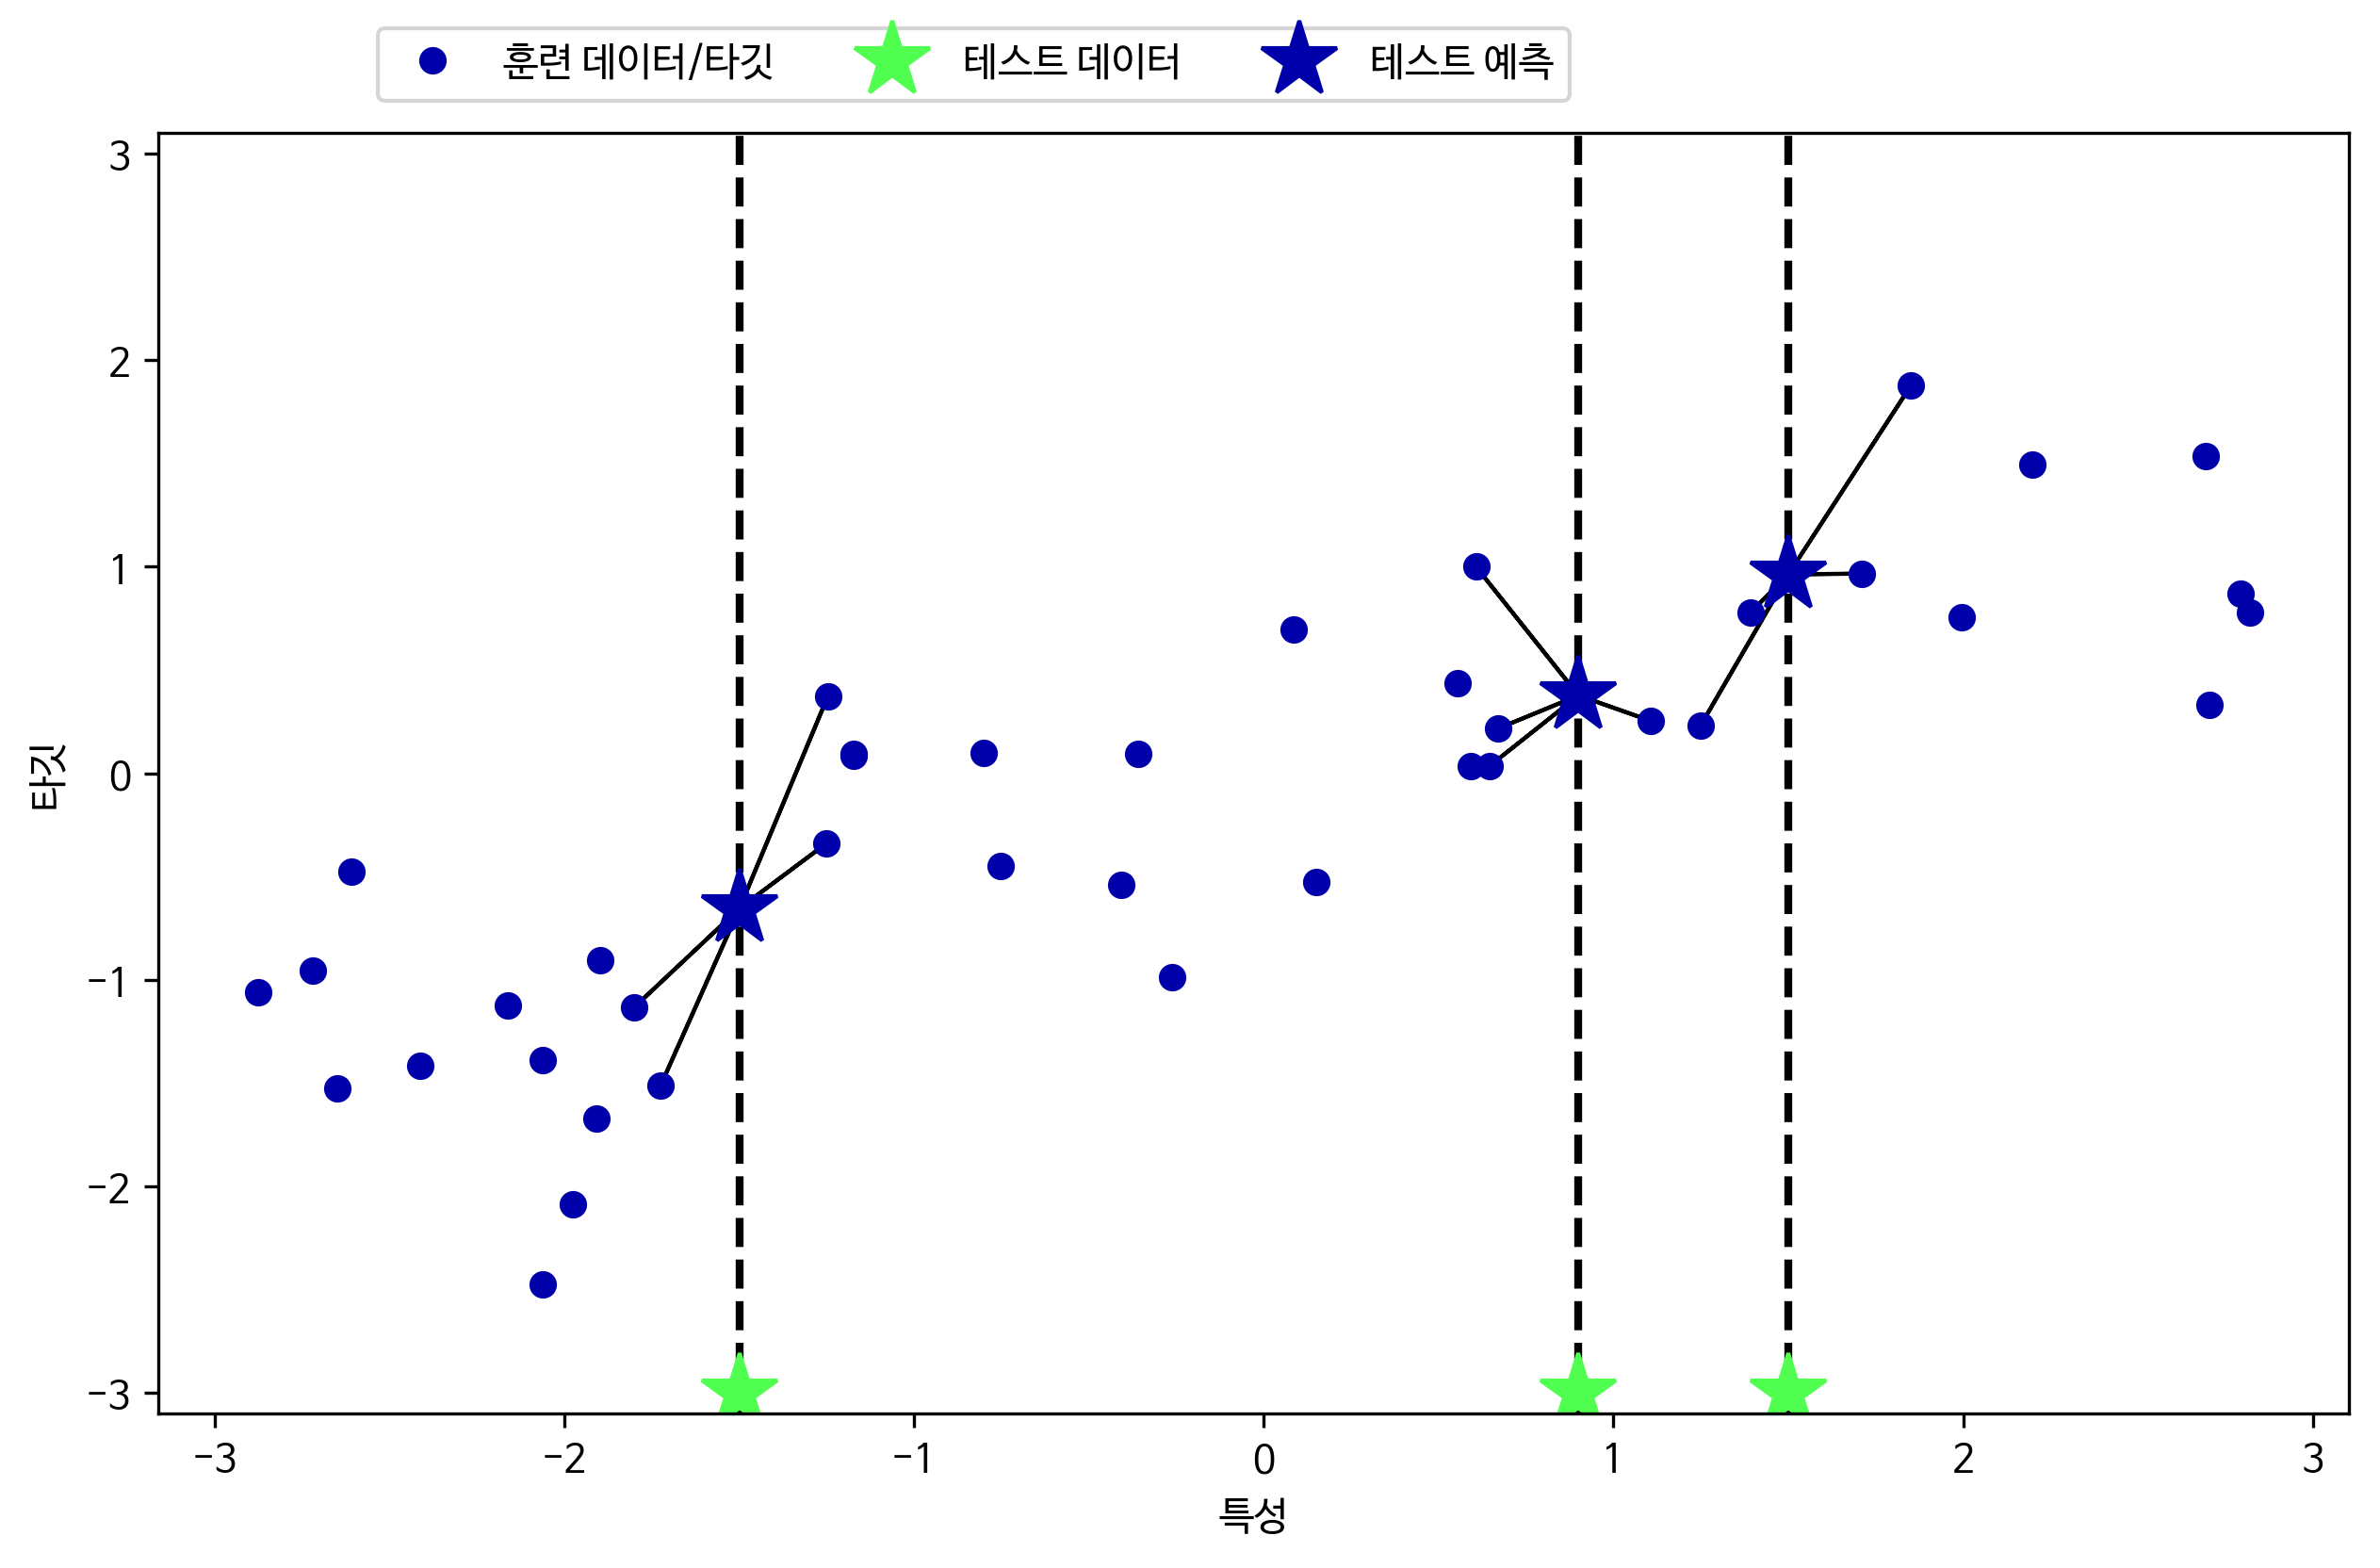

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=4)
#여러개의 최근접 이웃을 사용할땐 이웃간의 평균이 예측됨

- Classifier가 아니라 Regressor 함수를 제공한다
- 사용법은 거의같으면 분류가 목적이 아니라 회귀값을 찾는 것이 목적이다

In [33]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [34]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [35]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))
#회귀일때 R2값을 반환

테스트 세트 R^2: 0.83


### score() 값
- 일반 분류에서는 score가 정확도를 계산했으나, 회귀분석에서는 R^^2 값을 리턴한다 (결정계수)
- 0 < R^^2 < 1 사이의 값을 갖는다
- 1은 예측이 완벽하게 맞춘 경우이고, 0은 훈련세트의 출력값인 y_train의 평균으로 예측하는, 가장 단순한 평균치를 예상하는 모델의 결과이다

#### KNeighborsRegressor 분석
- k 값의 변화에 따른 성능 비교

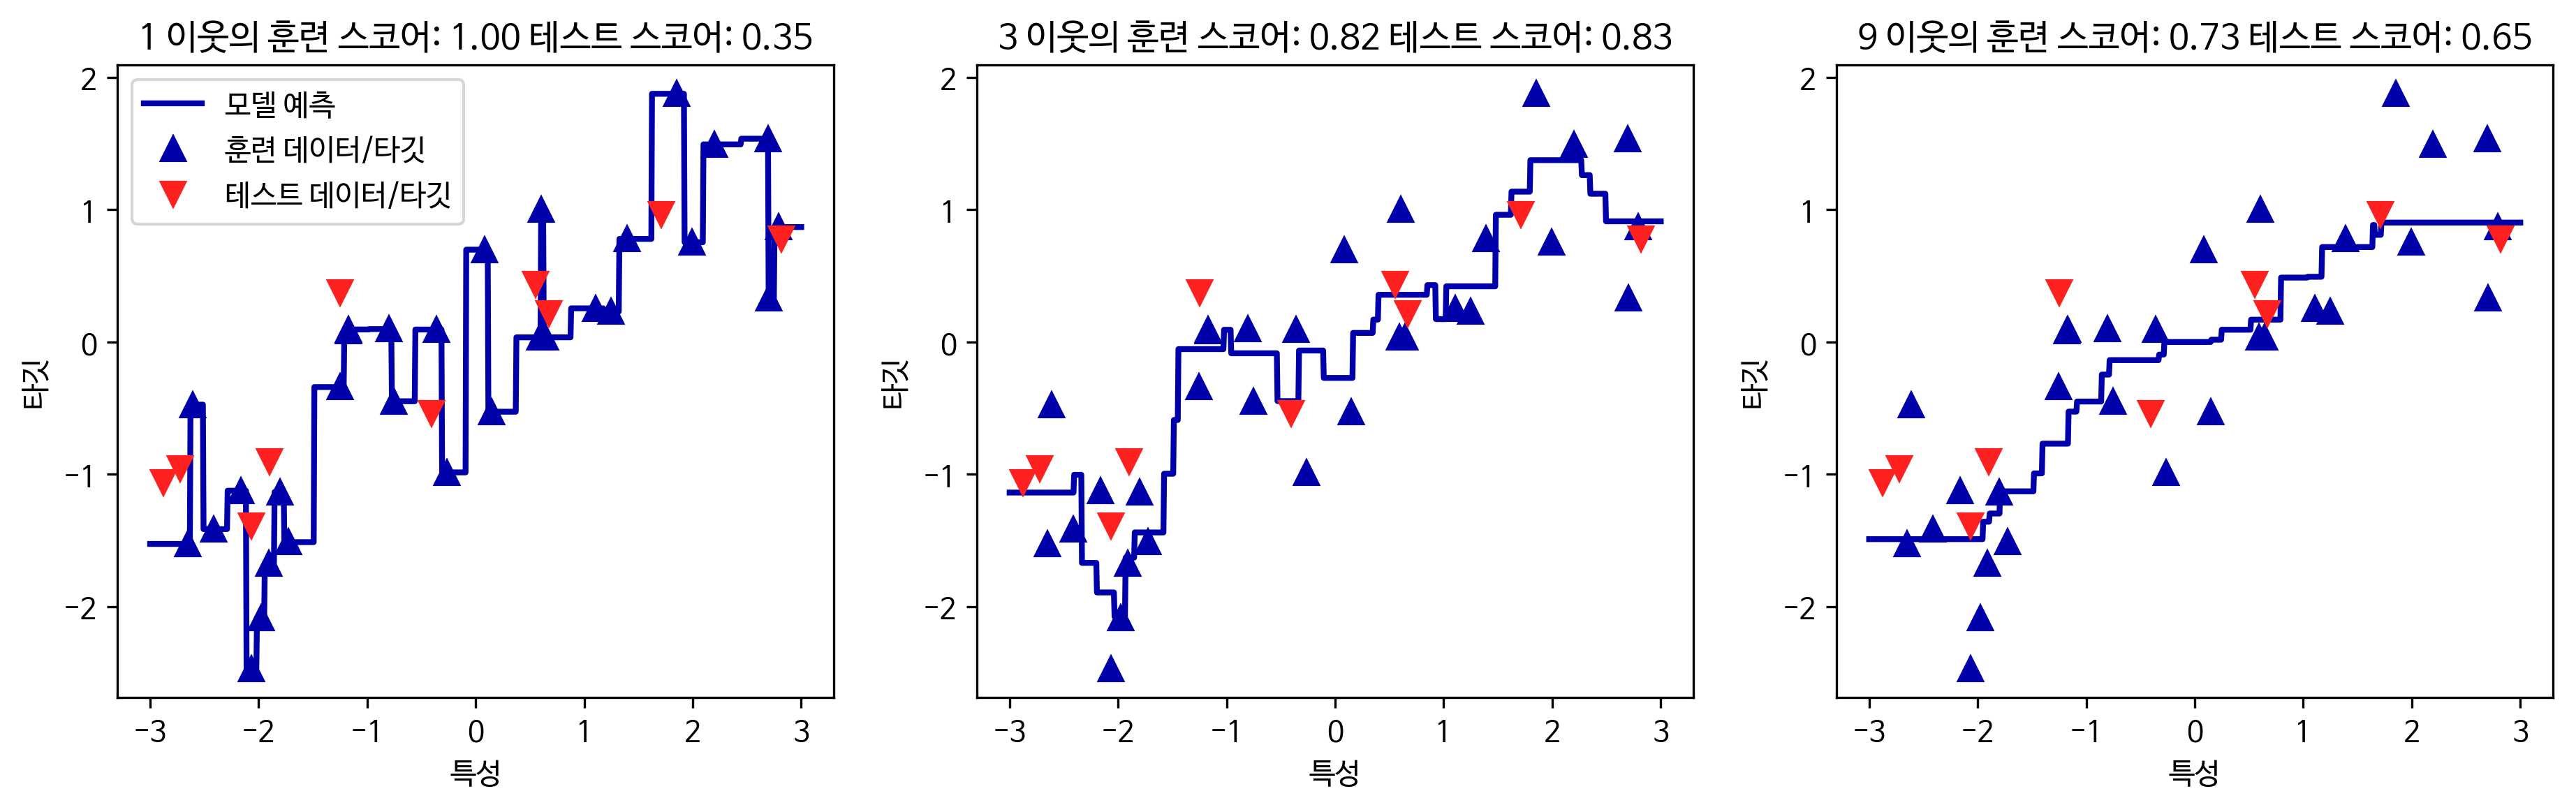

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

- 이웃을 하나만 사용할때는 훈련세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련데이터 포인트를 모두 지나감-매우 불안정한 예측
- 이웃을 많이 사용하면 훈련데이터에는 잘 안 맞을수 있지만 더 안정적인 예측

- kNN 방식이 이해하기도 쉽고 구현도 쉽지만, 데이터 사이즈가 커지면 동작이 매우 느려지는 단점이 있다. 특성(피처)가 수백개 이상으로 많은 경우나 sparse한 경우에도 잘 동작하지 않는다.
- 데이터의 전처리가 반드시 필요하다

- 실제로 회귀분석에서 kNN은 잘 사용하지 않는다
- 회귀에서 선형 회귀가 주로 사용되는데, 1차원에서는 장점이 잘 나타나지 않지만, 특성이 많은 경우일수록 선형 예측이 잘 동작한다

### 선형 모델
#### 선형 회귀 모델

$y = ax1 + bx2 + cx3 + d$


$y = WX + b$

w[0]: 0.393906  b: -0.031804


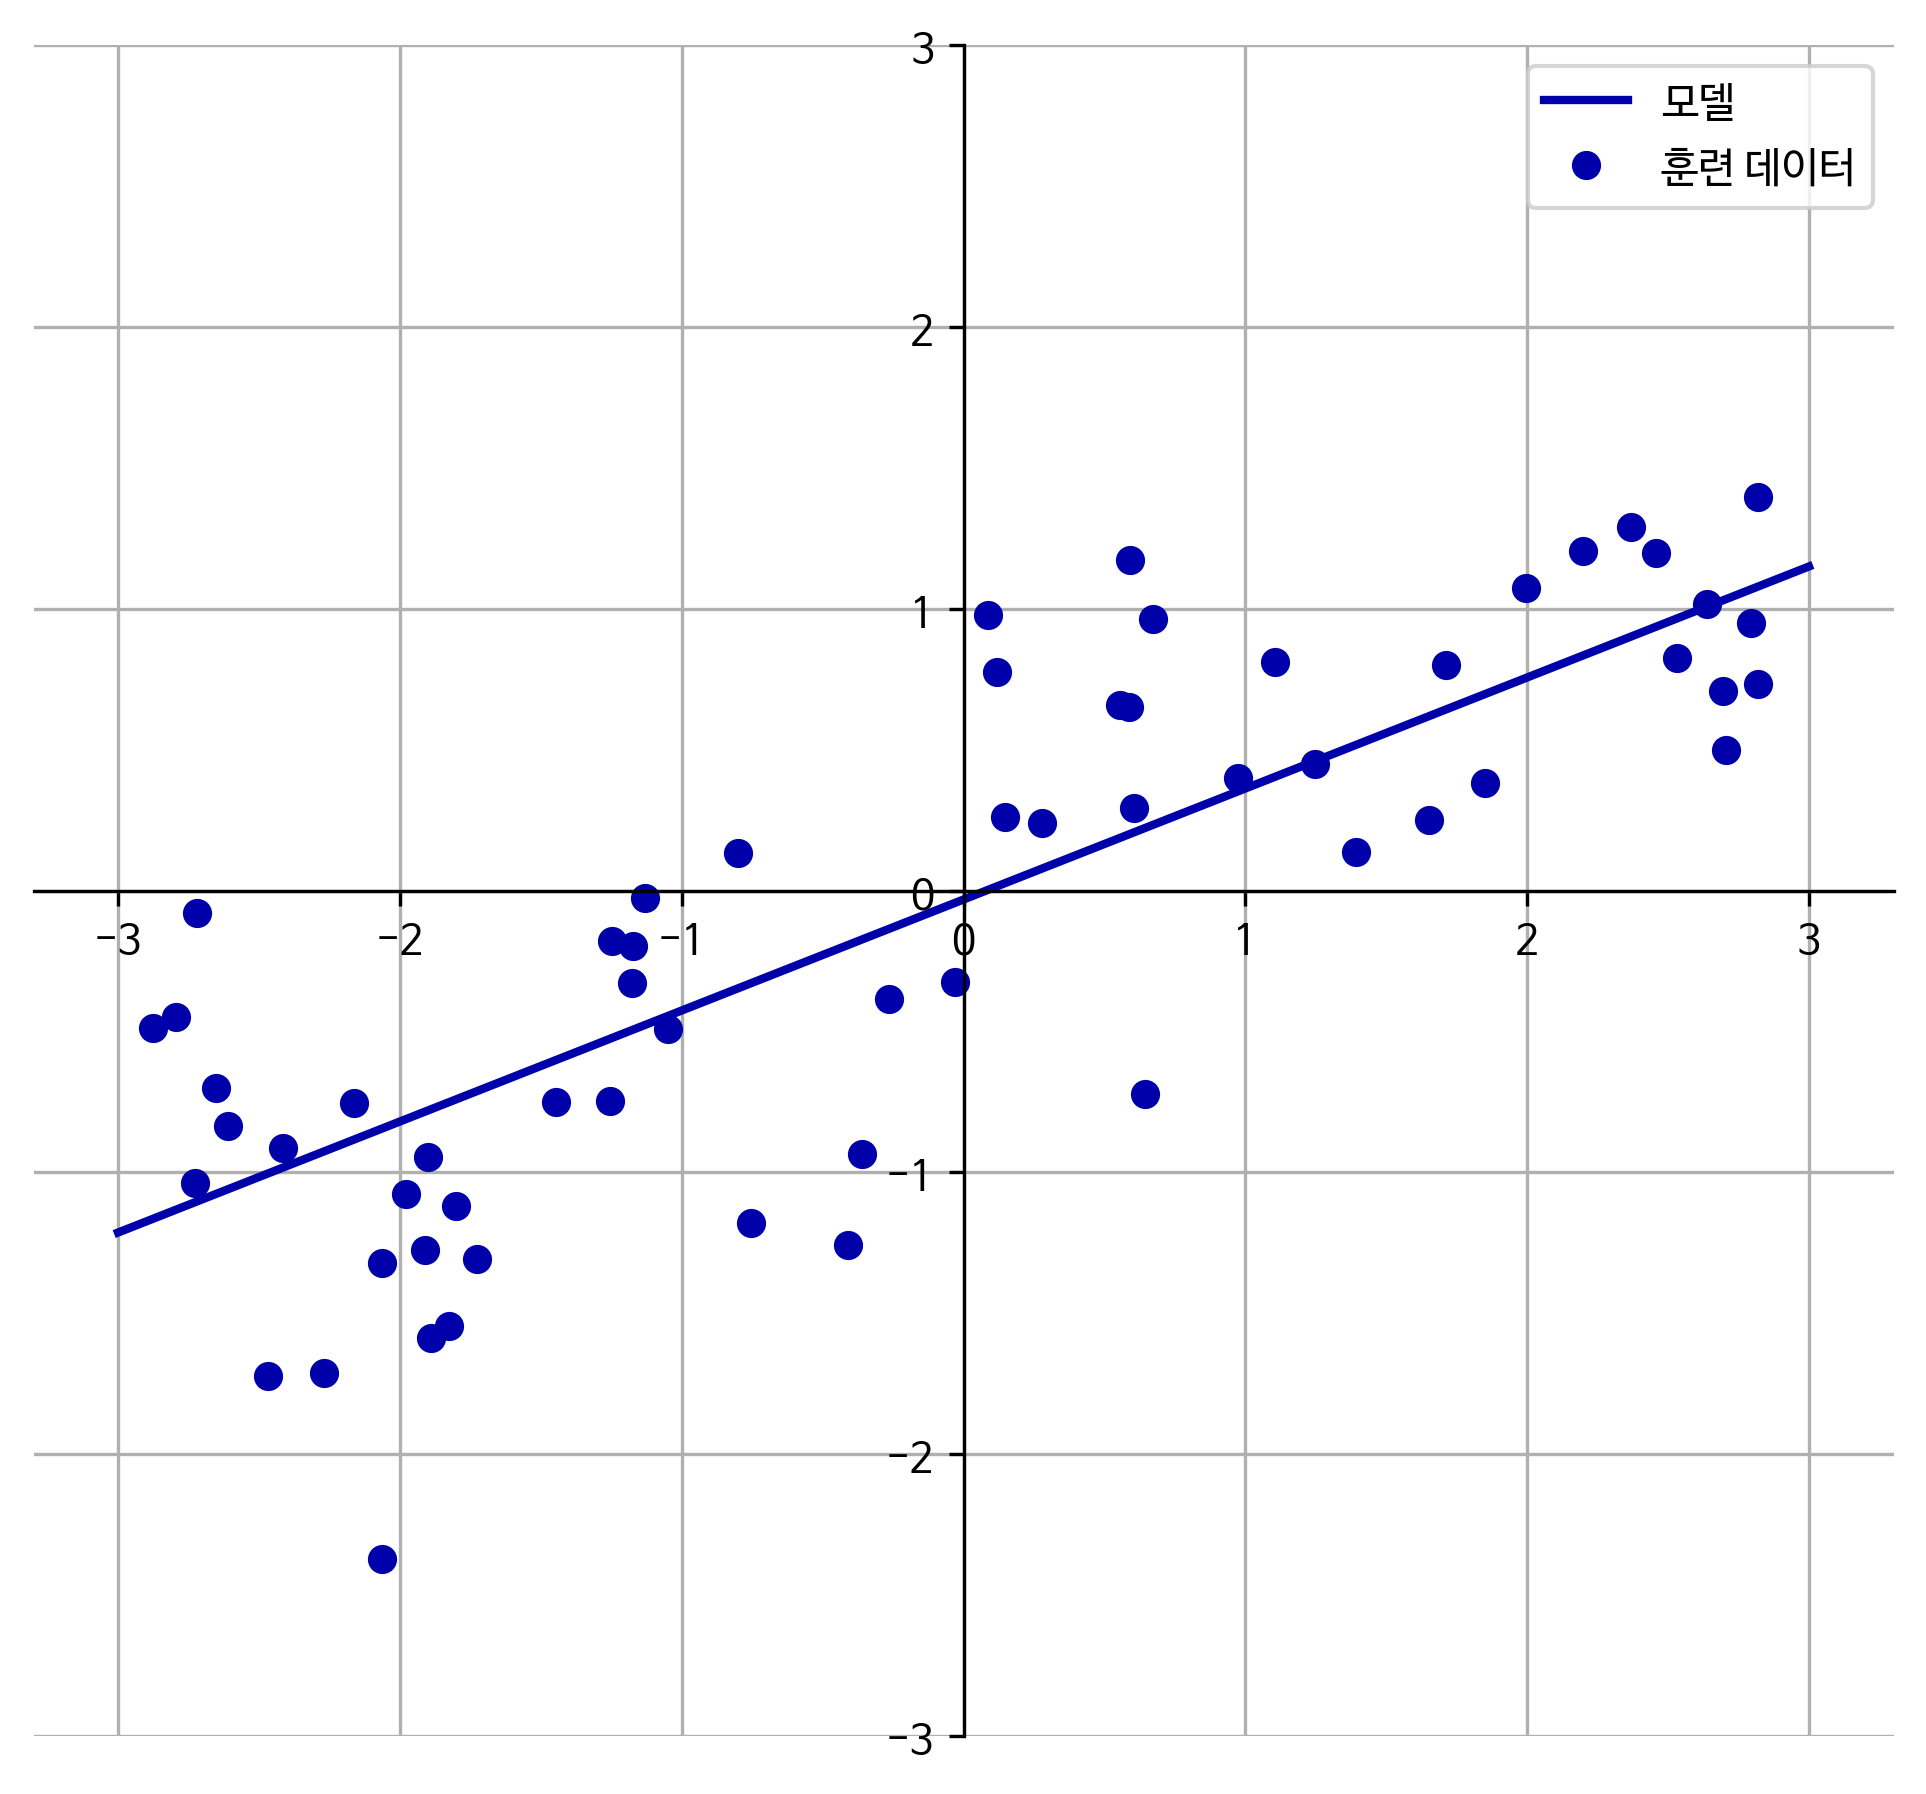

In [37]:
# 샘플 데이터
mglearn.plots.plot_linear_regression_wave()
# w[0]:기울기

- 직선형 모델이 많은 정보를 잃는 것처럼 보이지만 특성(피처)가 하나가 아니므로 (보통 수~수백개) 이들의 선형 조합은 충분히 잘 동작한다.

### 손실함수

- 최소제곱법을 가장 많이 사용한다
- MSE를 최소화 하는 것을 목표로 한다 (예측 오차의 자승의 평균치)
- 아래는 모델을 선형회귀로 선택하고, 훈련데이터로 학습(fit) 시키는 코드이다
- 시스템이 구한 내부 변수는 뒤에 "_"를 붙인 것이 많다

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [40]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
#훈현세트와 테스트세트의 점수가 매우 비슷 -> 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- score가 0.66이면 성능이 좋은 것은 아니다
- make_wave() 데이터 자체가 상관관계가 높지 않다 (오차가 크다)
- 보스턴 주택가격 데이터 사용예 (확장된 피처를 사용했다)

In [41]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [42]:
X_train.shape

(379, 104)

In [43]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
#훈련세트에서만 매우 정확! -> 과대적합

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## 릿지 회귀

- 일반적인 선형회귀에 추가로 제약을 가한 것 
- 가중치의 절대값을 가능한 작게 제한 함. 즉 전체적으로 계수의 크기가 작게 만드는 것 
- 또는 모든 계수들을 골고루 반영되게 하는 효과를 얻음
- Regularization으로 L2 규제에 해당한다 (규제란 과적합을 막기 위해서 필요한 제한을 말한다)
- L2 놈의 제곱을 페널티로 사용한다 (알파 계수)
- 알파값이 클수록 제약을 크게 정한 것으로 계수의 값이 작아진다

In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 리지 모데를 사용하여 테스트 점수가 높아진 것을 알 수 있다.
- 규제화를 하는 정도를 알파 값을 바꾸면서 여러가지로 확인해볼 수 있다.
- 규제를 많이 할수록 일반화는 유리하나 성능이 떨어지는 단점이 있다
- 아래는 알파를 10, 0.1 등으로 바꾸어 보았다

In [45]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]

In [46]:
for al in alpha_list:
    ridge10 = Ridge(al).fit(X_train, y_train)
    print ("알파 = ",  al)
    print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
    print("        테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

알파 =  0.0001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.62
알파 =  0.001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.63
알파 =  0.005
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.67
알파 =  0.01
훈련 세트 점수: 0.94
        테스트 세트 점수: 0.70
알파 =  0.05
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.76
알파 =  0.1
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.77
알파 =  1
훈련 세트 점수: 0.89
        테스트 세트 점수: 0.75
알파 =  10
훈련 세트 점수: 0.79
        테스트 세트 점수: 0.64
알파 =  100
훈련 세트 점수: 0.60
        테스트 세트 점수: 0.42


In [47]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


### 계수 값 살펴보기
- 여러가지 리지 회귀분석 결과로 얻는 계수를 보면 이들의 특징을 비교하기가 쉽다
- 아래는 계수의 분포를 그리는 코드이다
- 결과를 보면 규제를 많이 할수록(알파가 클수록) 계수들이 작은 값을 갖는다 (큰 차이가 없게 편차를 줄인 효과이다)

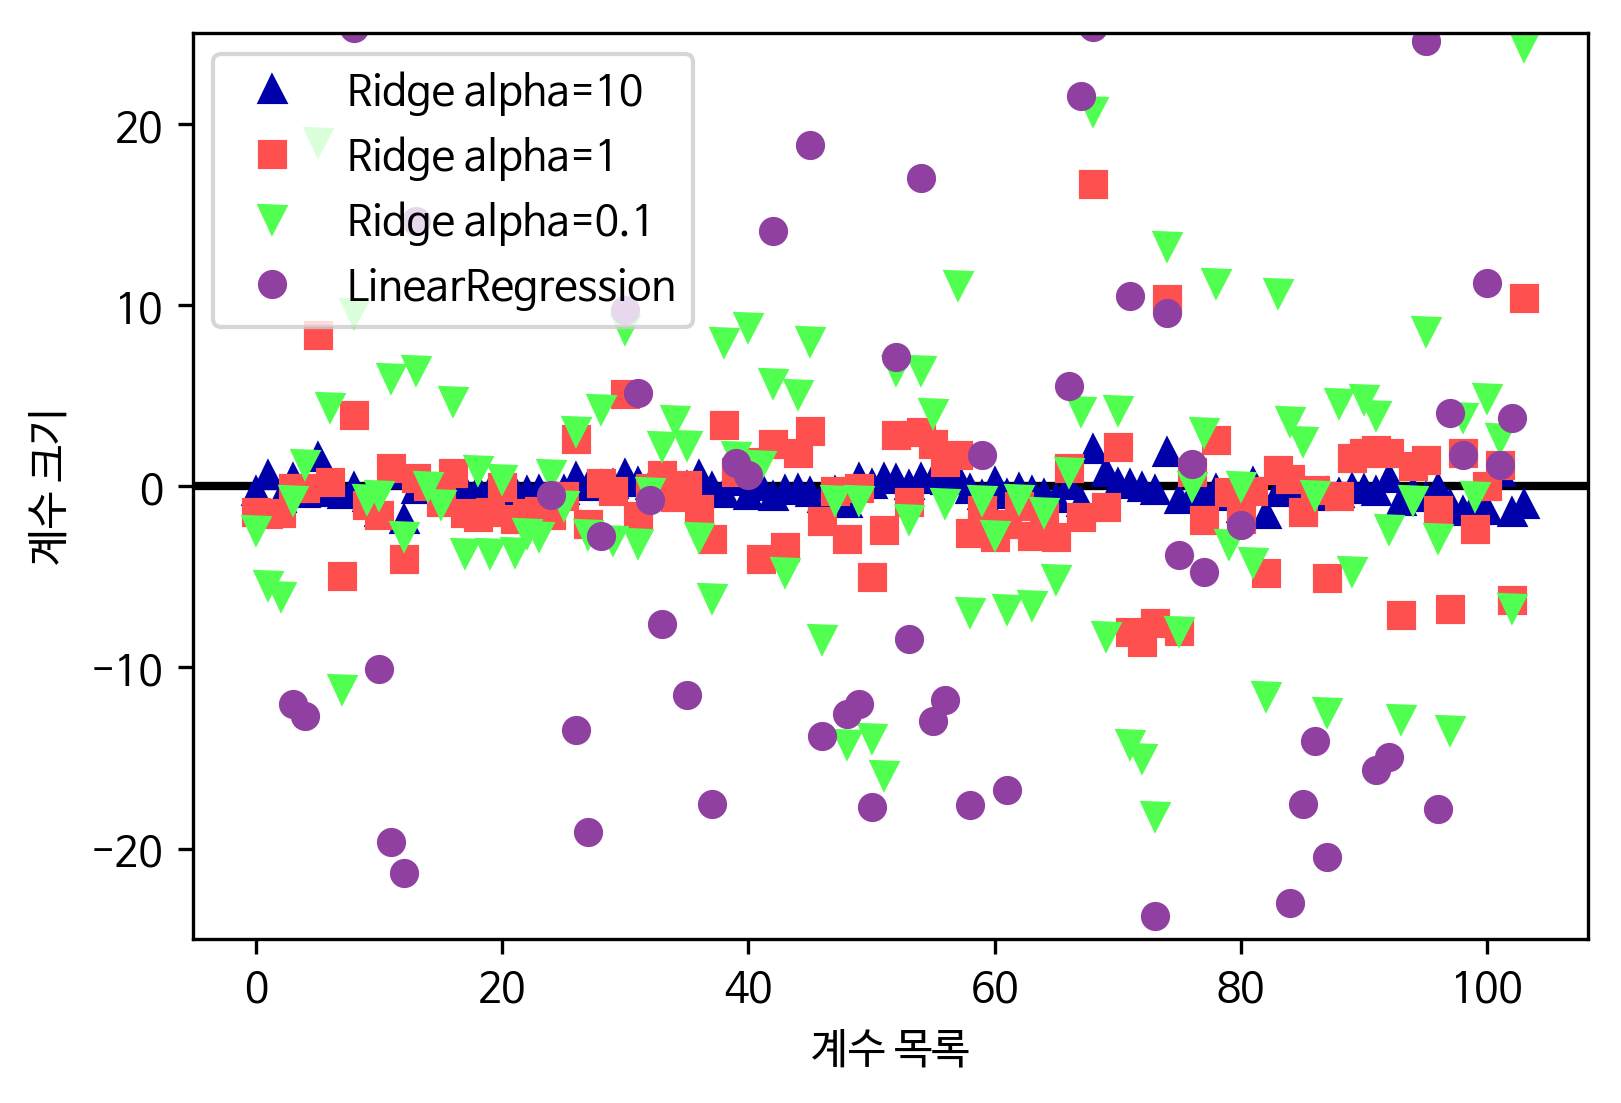

In [48]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- 훈련 데이터 수를 늘이면 어떤 차이가 나타나는가?
- 학습데이터를 늘리면서 나타나는 학습결과를 그려보는 것을 학습곡선이라고 한다 (learning curve)
- 아래 결과를 보면 리지 알고리즘의 성능이 일반 선형회귀보다 매우 좋은 것을 알 수 있다
- 그러나 데이터의 규모가 커지면 규제항이 덜 중요해져서 릿지 회귀의 성능이 선형회귀와 같아진다 (데이터가 많아질수록 모델이 데이터를 기억하거나 과적합하기가 어렵다)

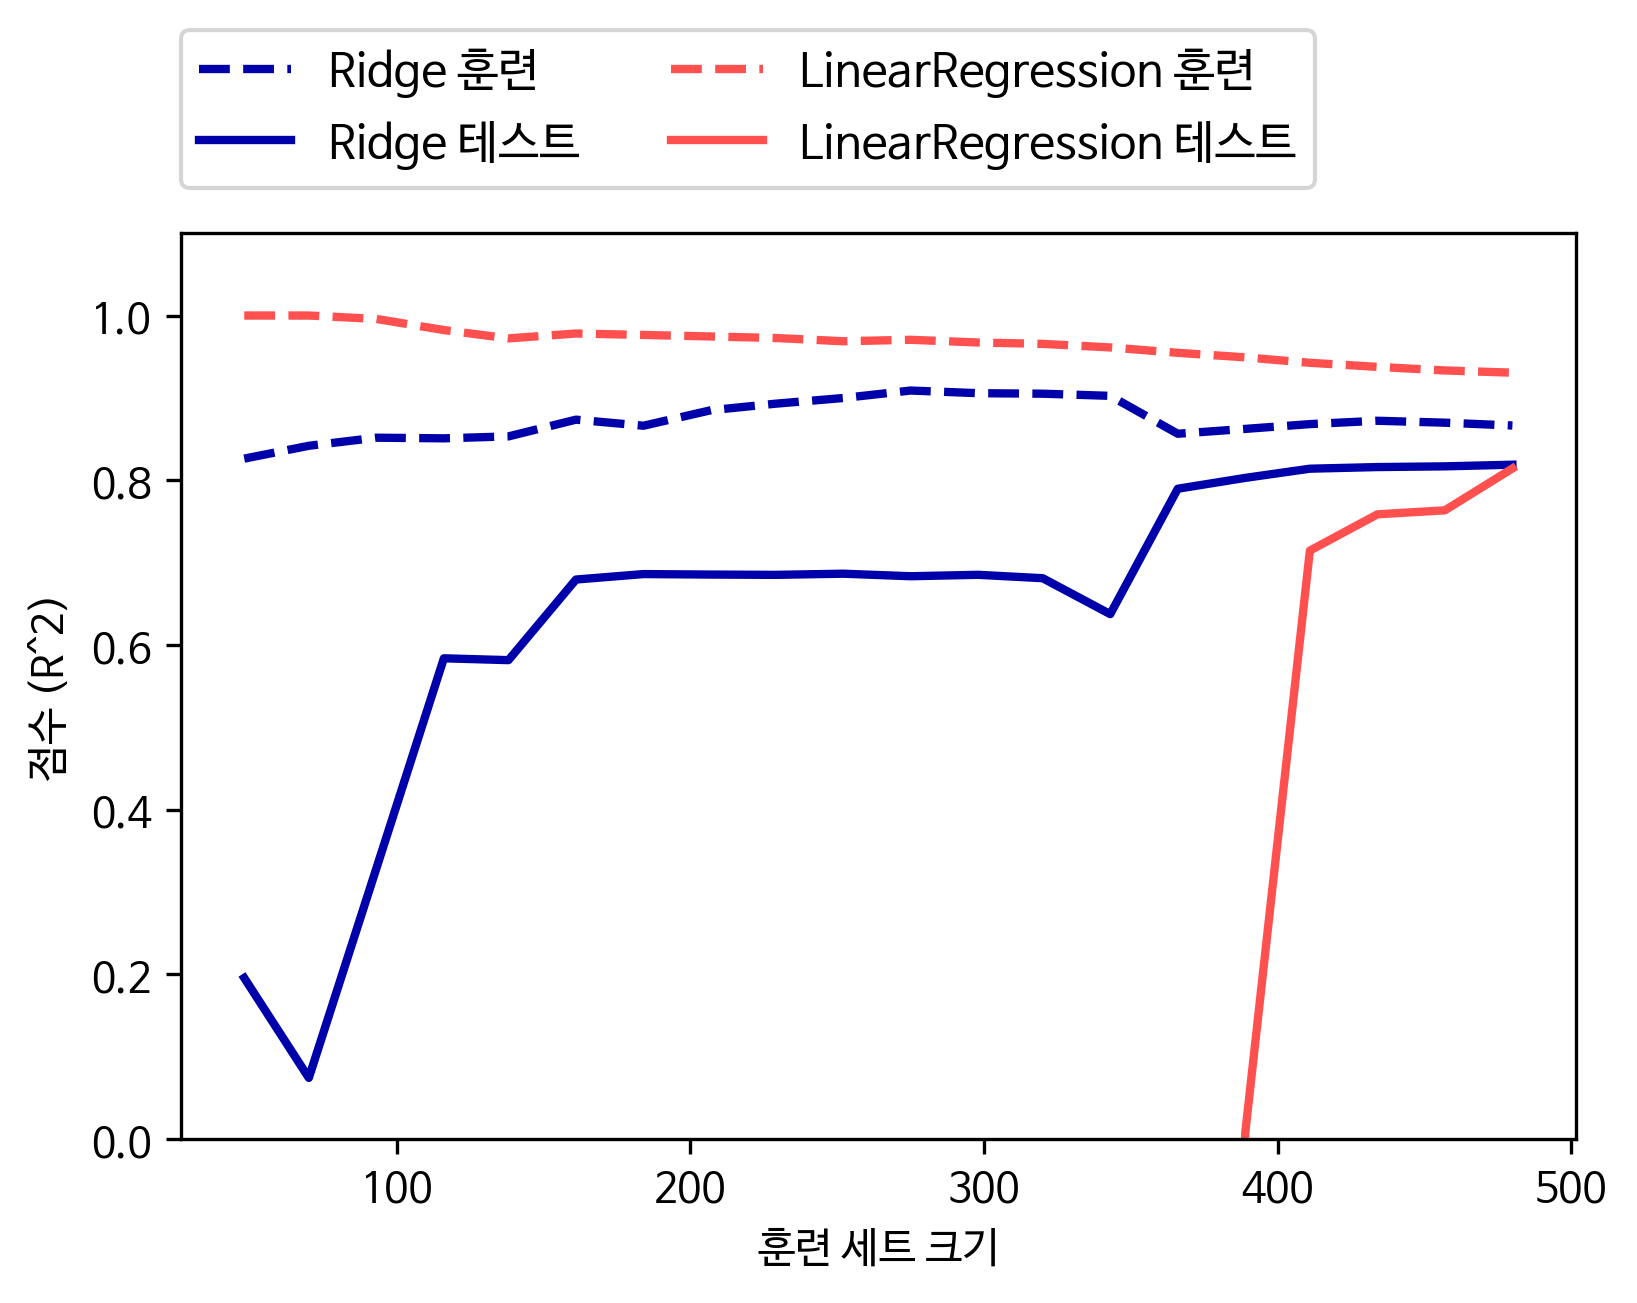

In [49]:
mglearn.plots.plot_ridge_n_samples()

### Lasso 규제
- 릿지 회귀처럼 계수의 크기를 최소화 한다. 단 L1 규제를 사용한다.
- 일부 계수는 0으로 수렴해버리므로 특성 선택이 자동으로 이루어지는 셈이 된다
- **모델을 이해하기 쉬워지고 어떤 특성이 중요한지를 파악하기 쉬워진다**

- 훈련데이터와 테스트 데이터에 대해 score가 비슷하면 과소적합이다

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [51]:
print(lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


- 위의 결과를 보면 겨우 4개의 특성만 사용함으로써 성능이 좋지 않은 것을 알 수 있다.(알파값이 현재 1로 설정되어 있다)
- 알파값을 0.01로 바꾸어 보겠다. (특성을 33개 사용하고 성능도 좋아졌다)


In [52]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [53]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


Text(0,0.5,'계수 크기')

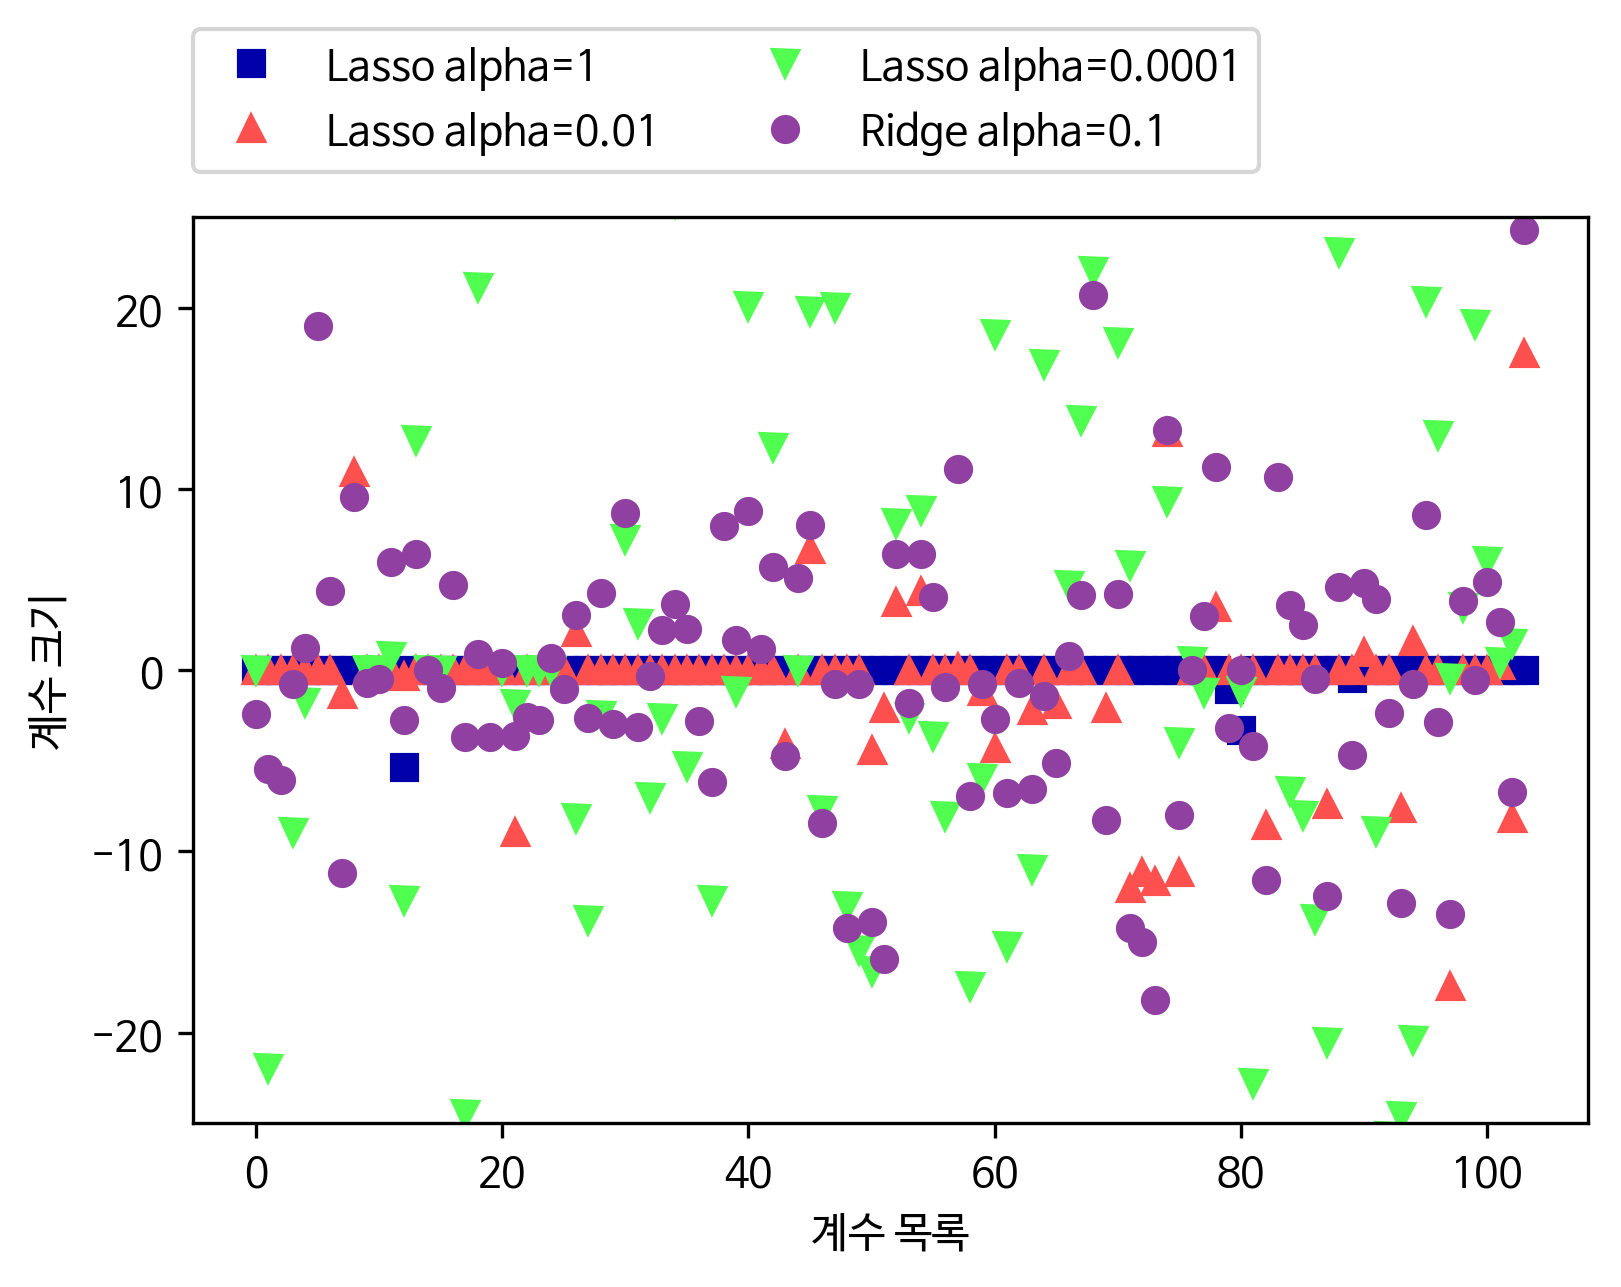

In [54]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- 일반적으로 리지 알고리즘이 널리 사용된다.
- 라소는, 특징의 갯수를 줄이려고 할 때 사용된다 (모델을 간단하게 만들어 해석을 쉽게 하게 해준다)

## 선형 모델을 사용한 분류
- 예측 결과가 '+' 인지 '-' 인지를 보고 이진 분류를 하는데 선형모델이 자주 사용된다

$ y - (WX+b) > 0$

$ y - (WX+b) < 0$

- 선형회귀 모델, 서포트벡터 머신, 로지스틱회귀 모델 등이 사용된다.
- 로지스틱 리그레션은 원래 숫자를 예측하는 "회귀" 알고리즘이 아니라 분류 알고리즘이다

- 로지스틱회귀, SVC 두가지 모델에 대해 성능을 비교해보겠다.
- 결정경계를 나타내는 직선을 표시했다
- 규제를 하는 정도 (C 값)에 따라서 C 값이 크면 규제가 약하고, C 값이 작으면 규제가 크다. 규제가 작다는 것의 의미는 가능한 훈련데이터에 맞게 학습을 하라는 뜻이다. 규제가 클수록 일반화를 더 중요시 하는 것이다

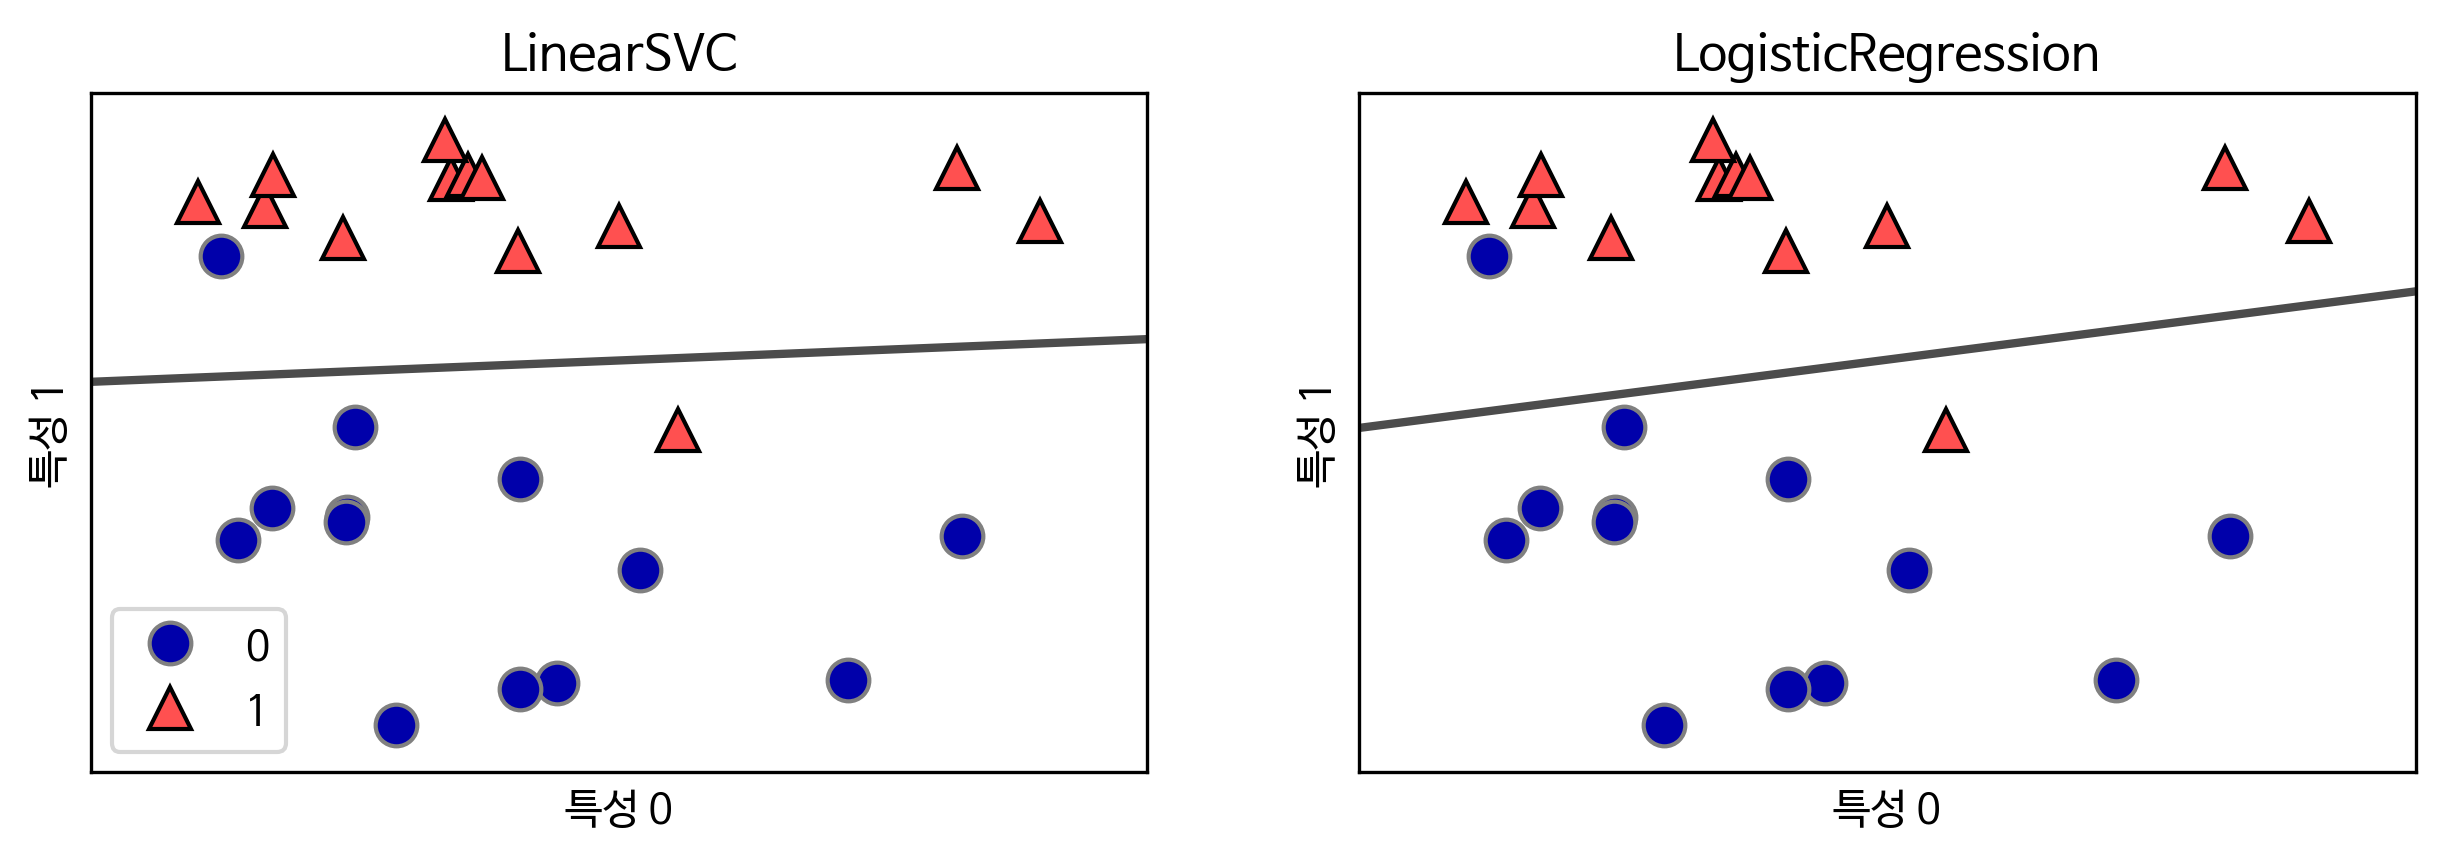

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- 아래는 여러가지 규제에 대해서 결정경계를 그렸다
- 오른쪽 모델일수록 과적합된 것

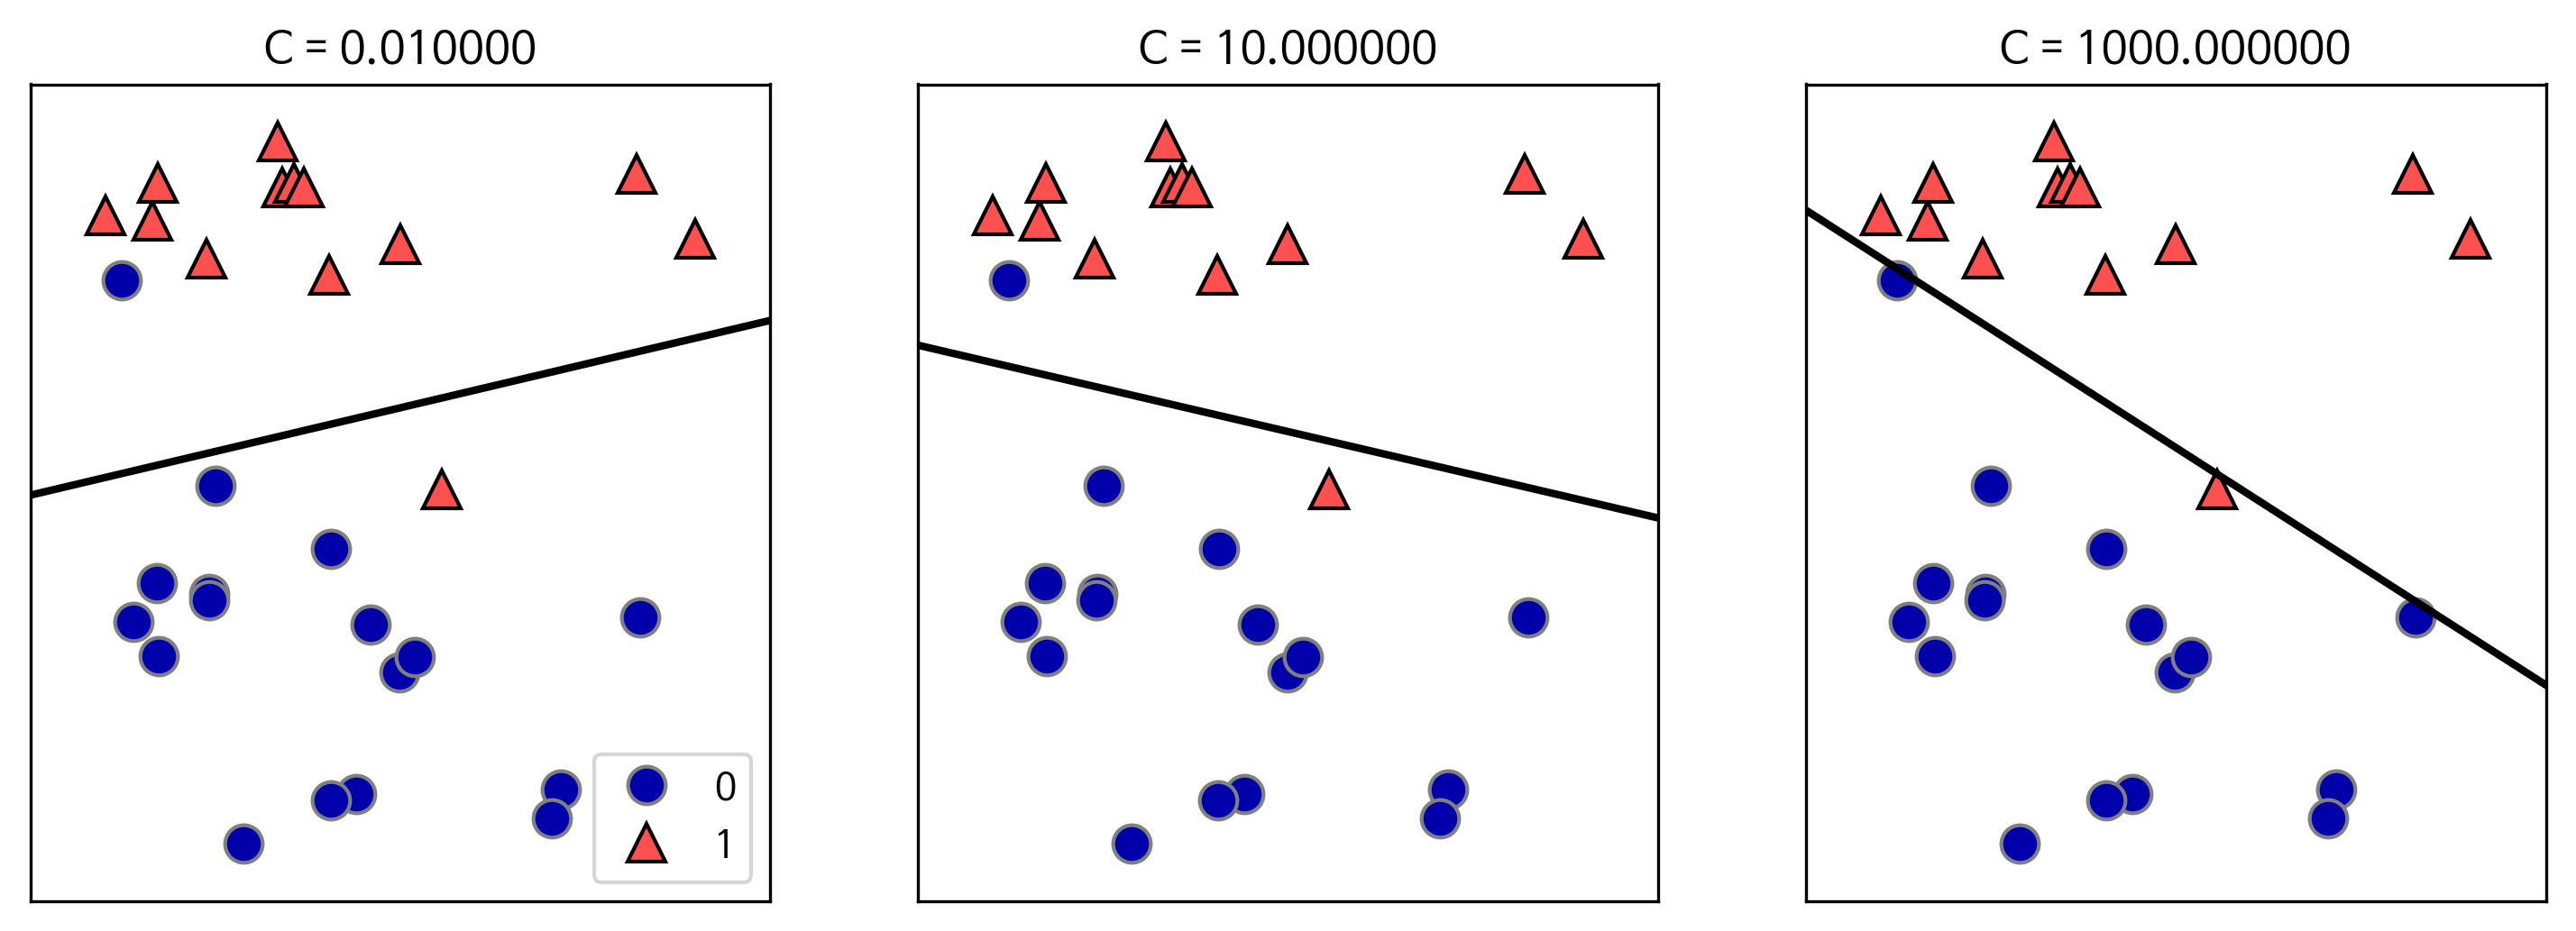

In [56]:
mglearn.plots.plot_linear_svc_regularization()

In [57]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


- 훈련데이터와 테스트데이터 결과가 비슷하다는 것의 의미는 아직 모델을 더 정교하게 만들 여지가 있다는 뜻, 즉 과소적합이라는 뜻이다.
- C=100으로 하여 규제를 풀어주면

In [58]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


- C=0.01로 하여 규제를 더 강하게 하면

In [59]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


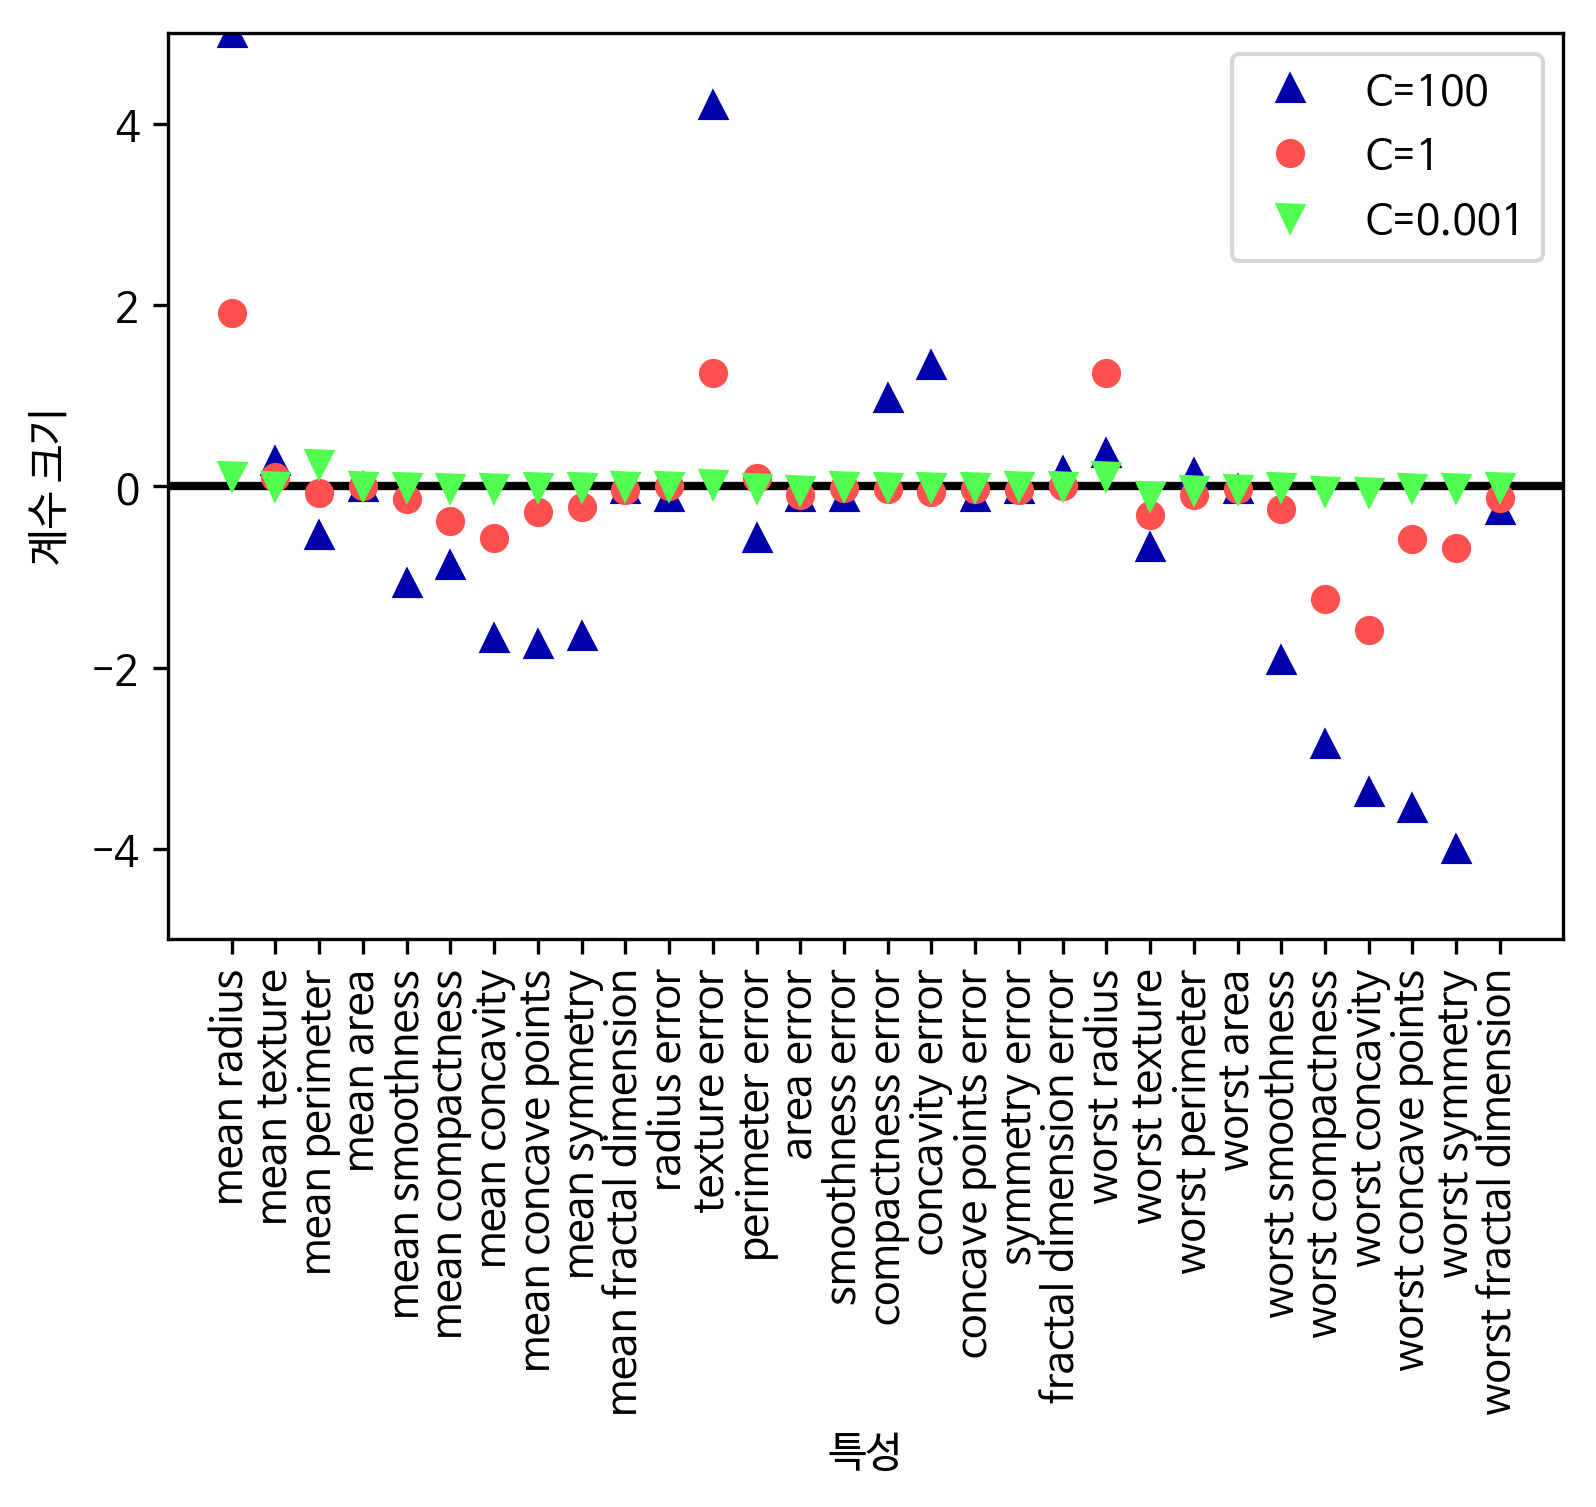

In [60]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


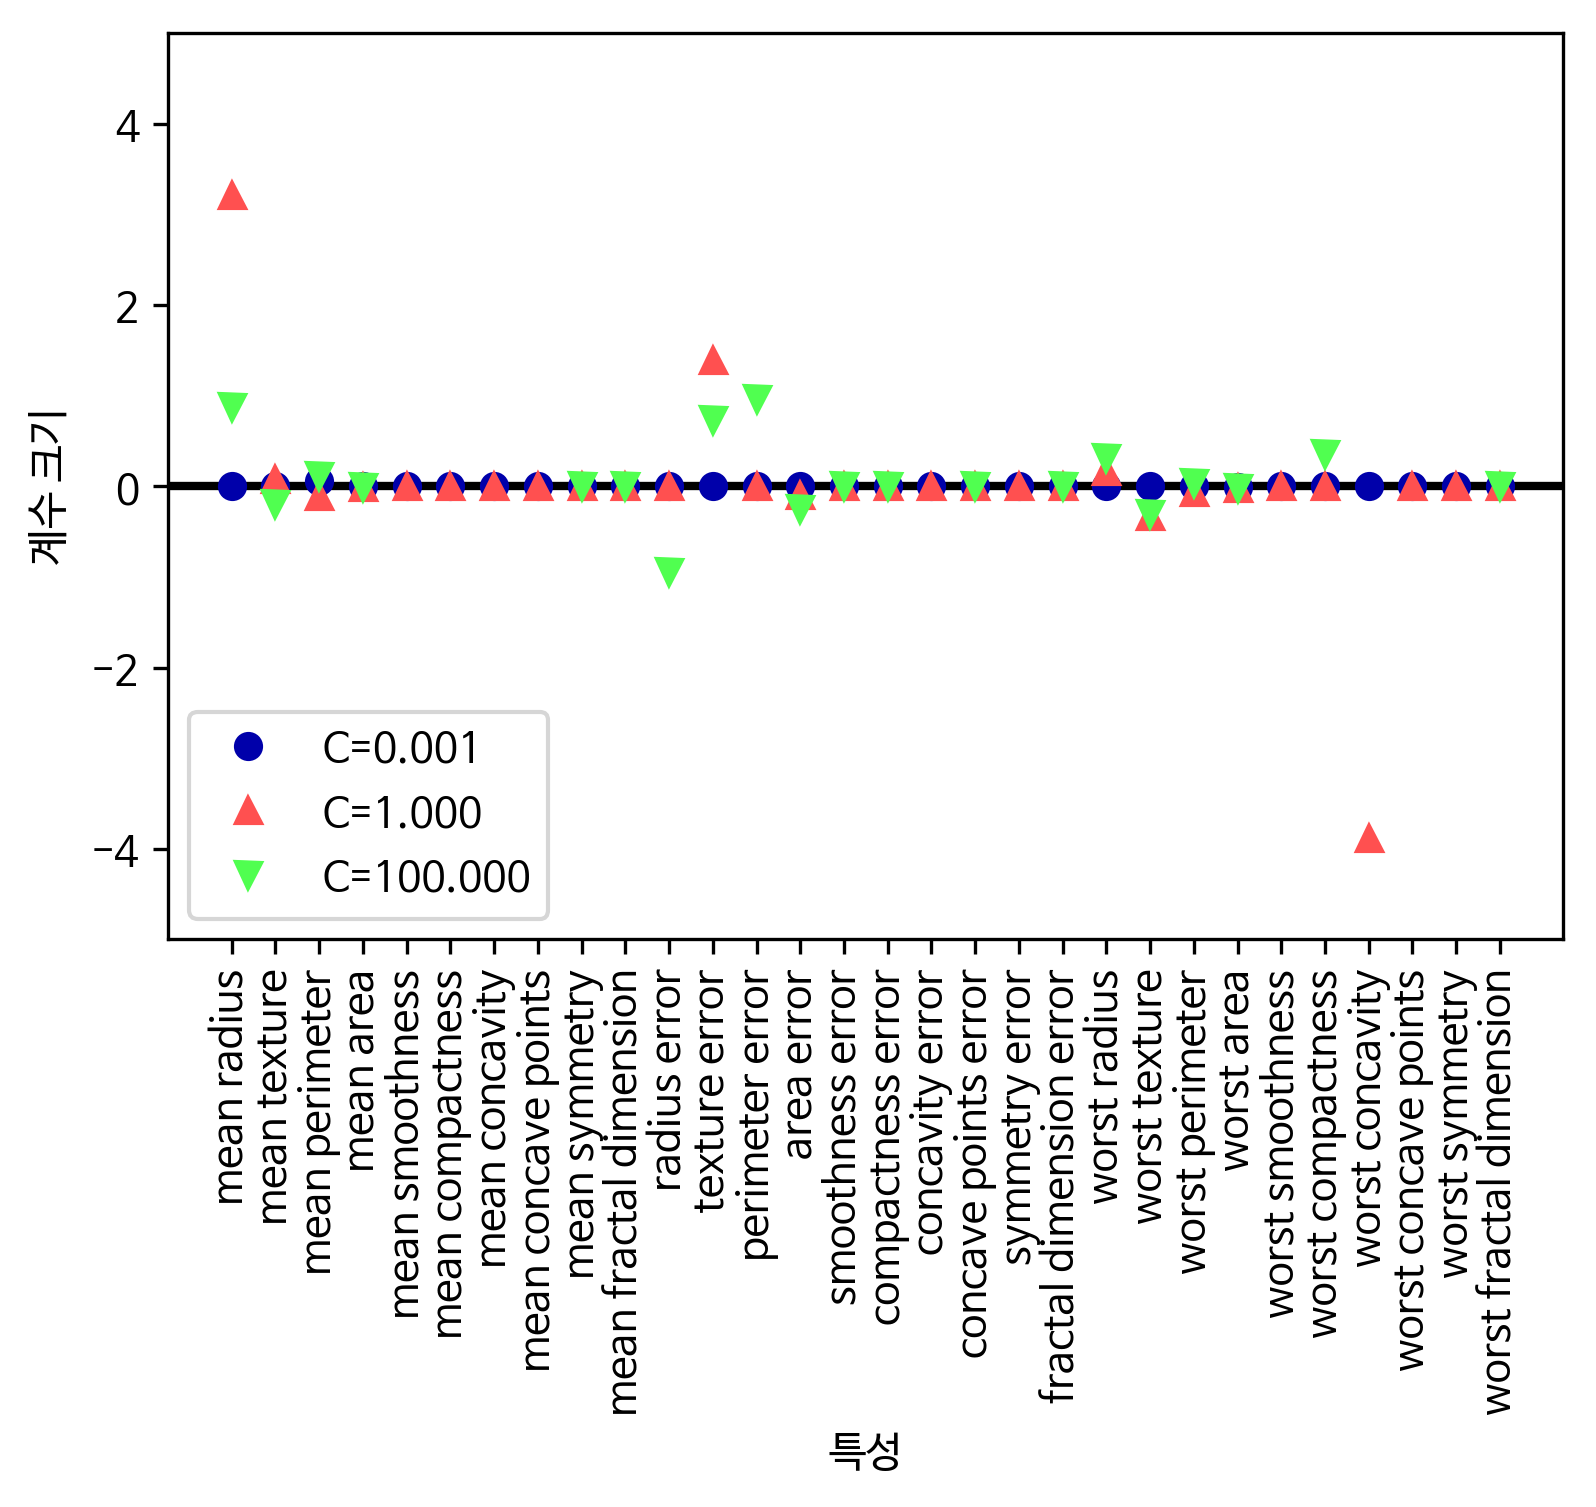

In [61]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류
- 대부분의 선형분류기는 이진 분류만 가능하다 (로지스틱회귀는 제외)
- 보통 일대다(one-to-rest)방법을 사용하는데, 한 클래스와 나머지 전체를 구분하는 이진 분류를 여러번 적용하는 방식이다.
- 아래는 세가지 클래스를 랜덤하게 만들어주는 make_blobs()를 사용해 데이터를 생성했다

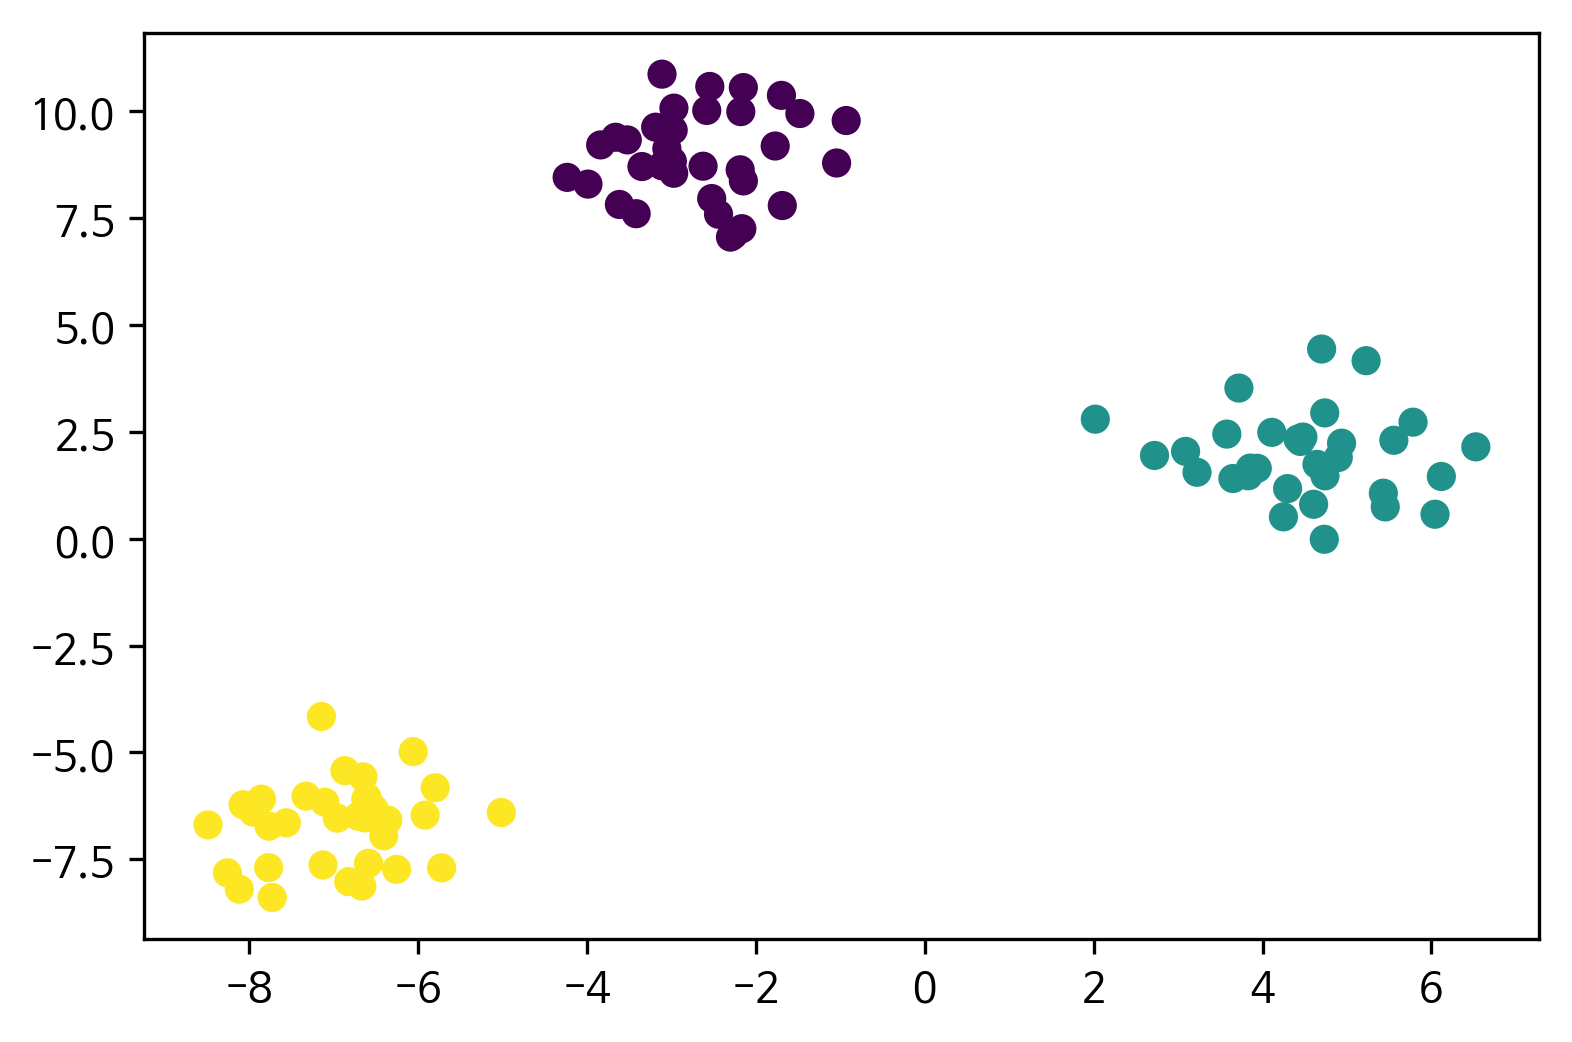

In [62]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

-  보기 좋게 다시 그렸다

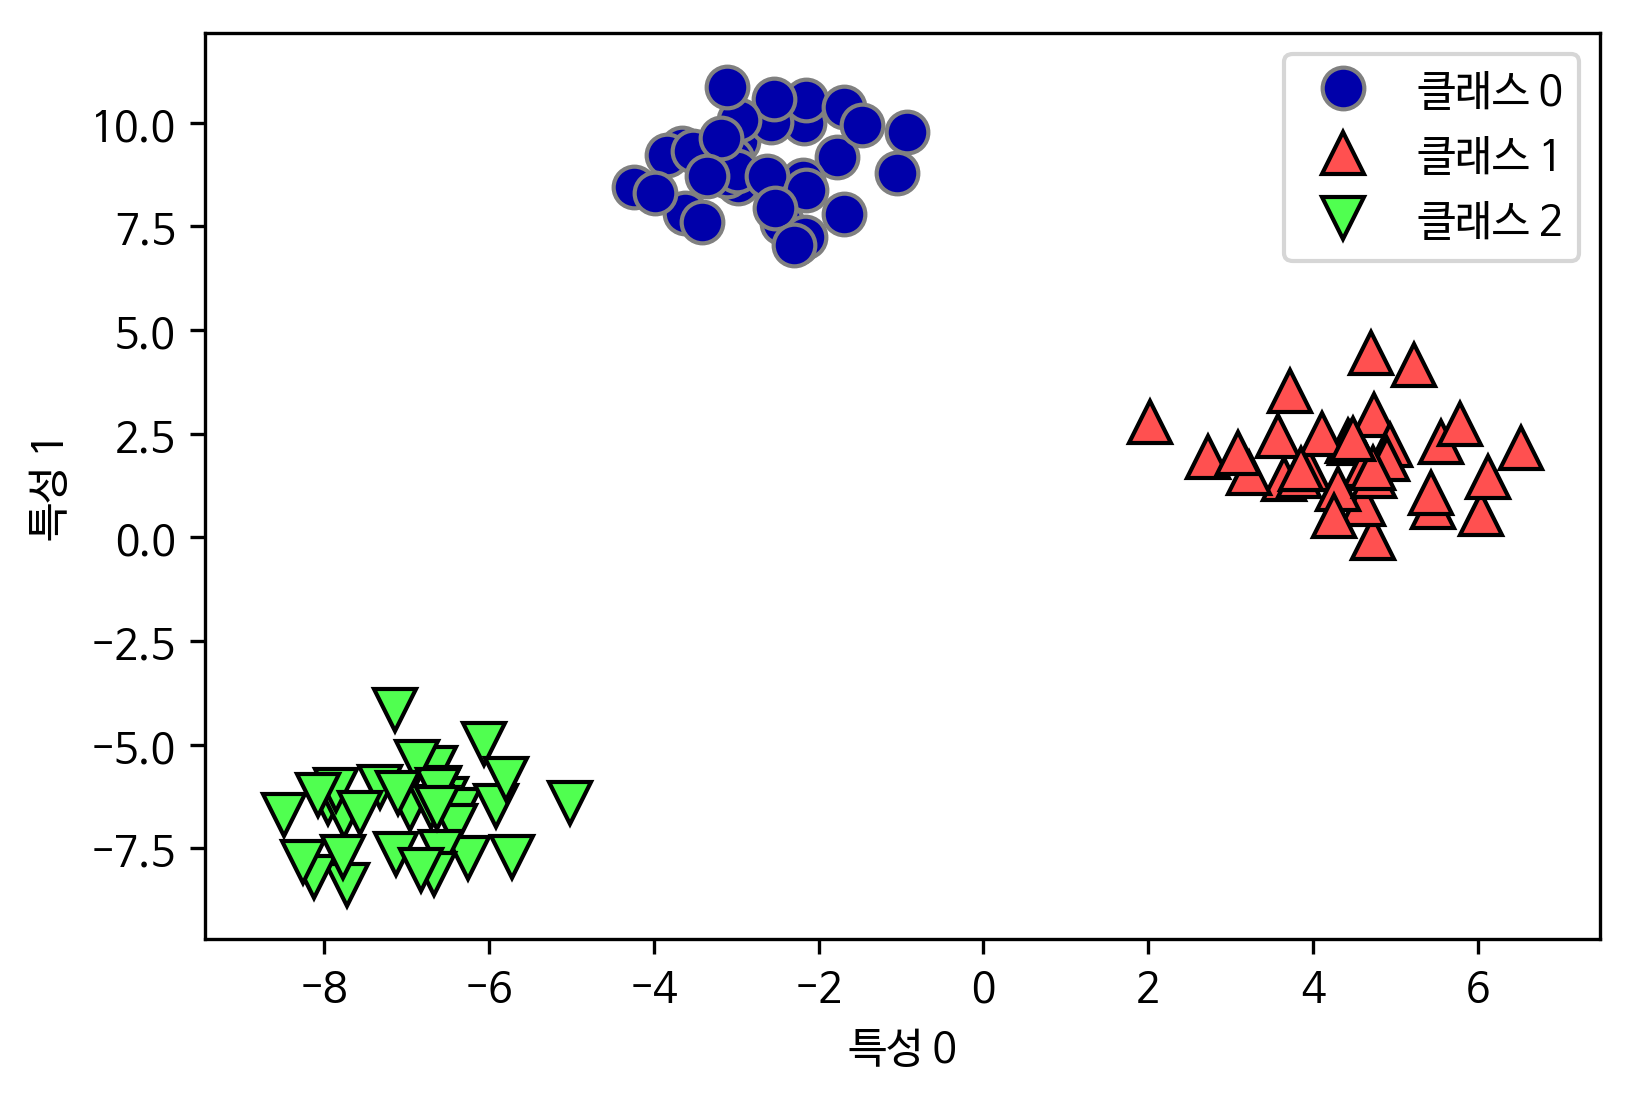

In [63]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

- LinearSVC 사용하여 분류기를 만든다. 분류경계를 3 세트 만든다 (클래스가 3개 이므로)

In [64]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


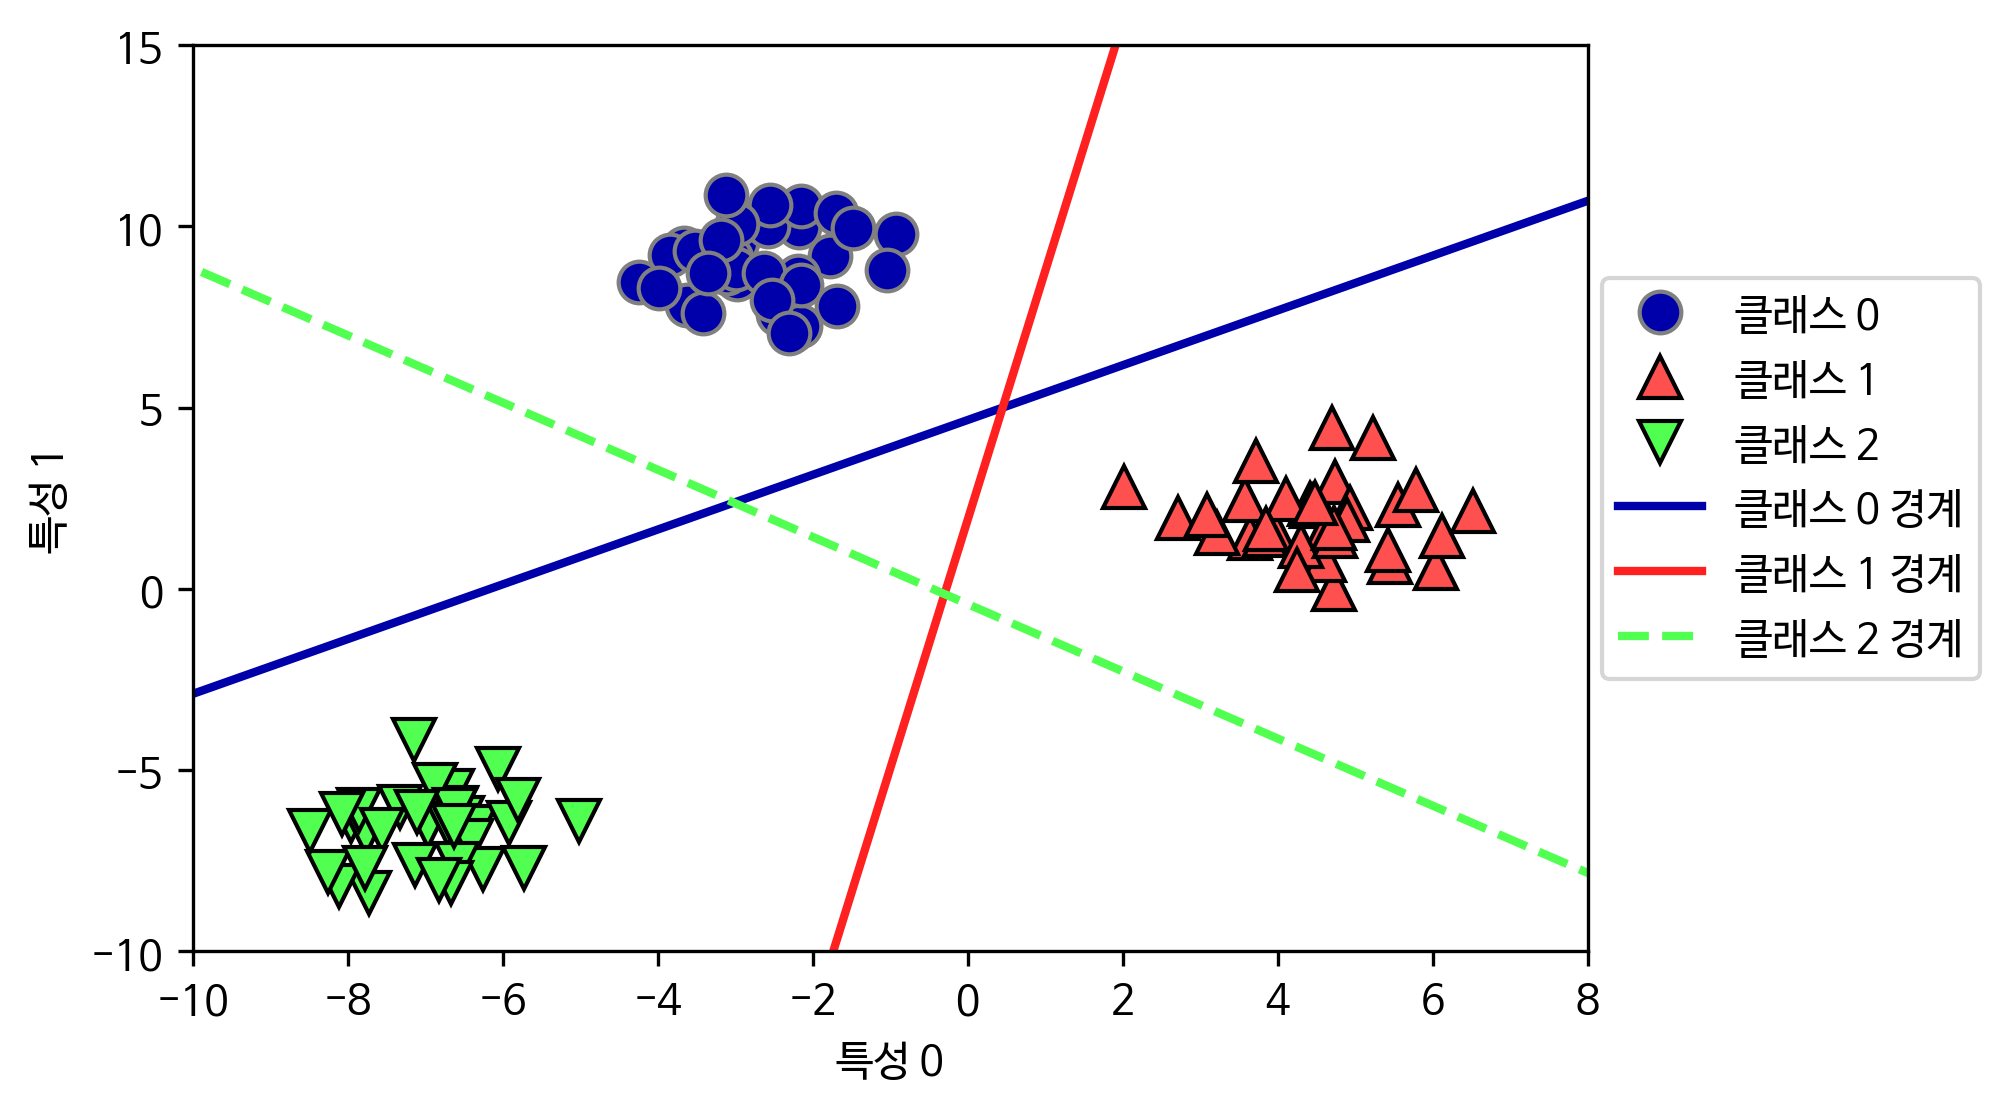

In [65]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

- 위에서 가운데 삼각형 부분에 들어오는 샘플은 무엇으로 분류할까? (현재는 어디도 속하지 않은 곳)
- 결정경계를 보기 쉽게 색으로 표현해보았다
- plot_2d_classification 라는 함수는 분류 동작을 확인하기 위해서 임의로 만든 함수이다.

Text(0,0.5,'특성 1')

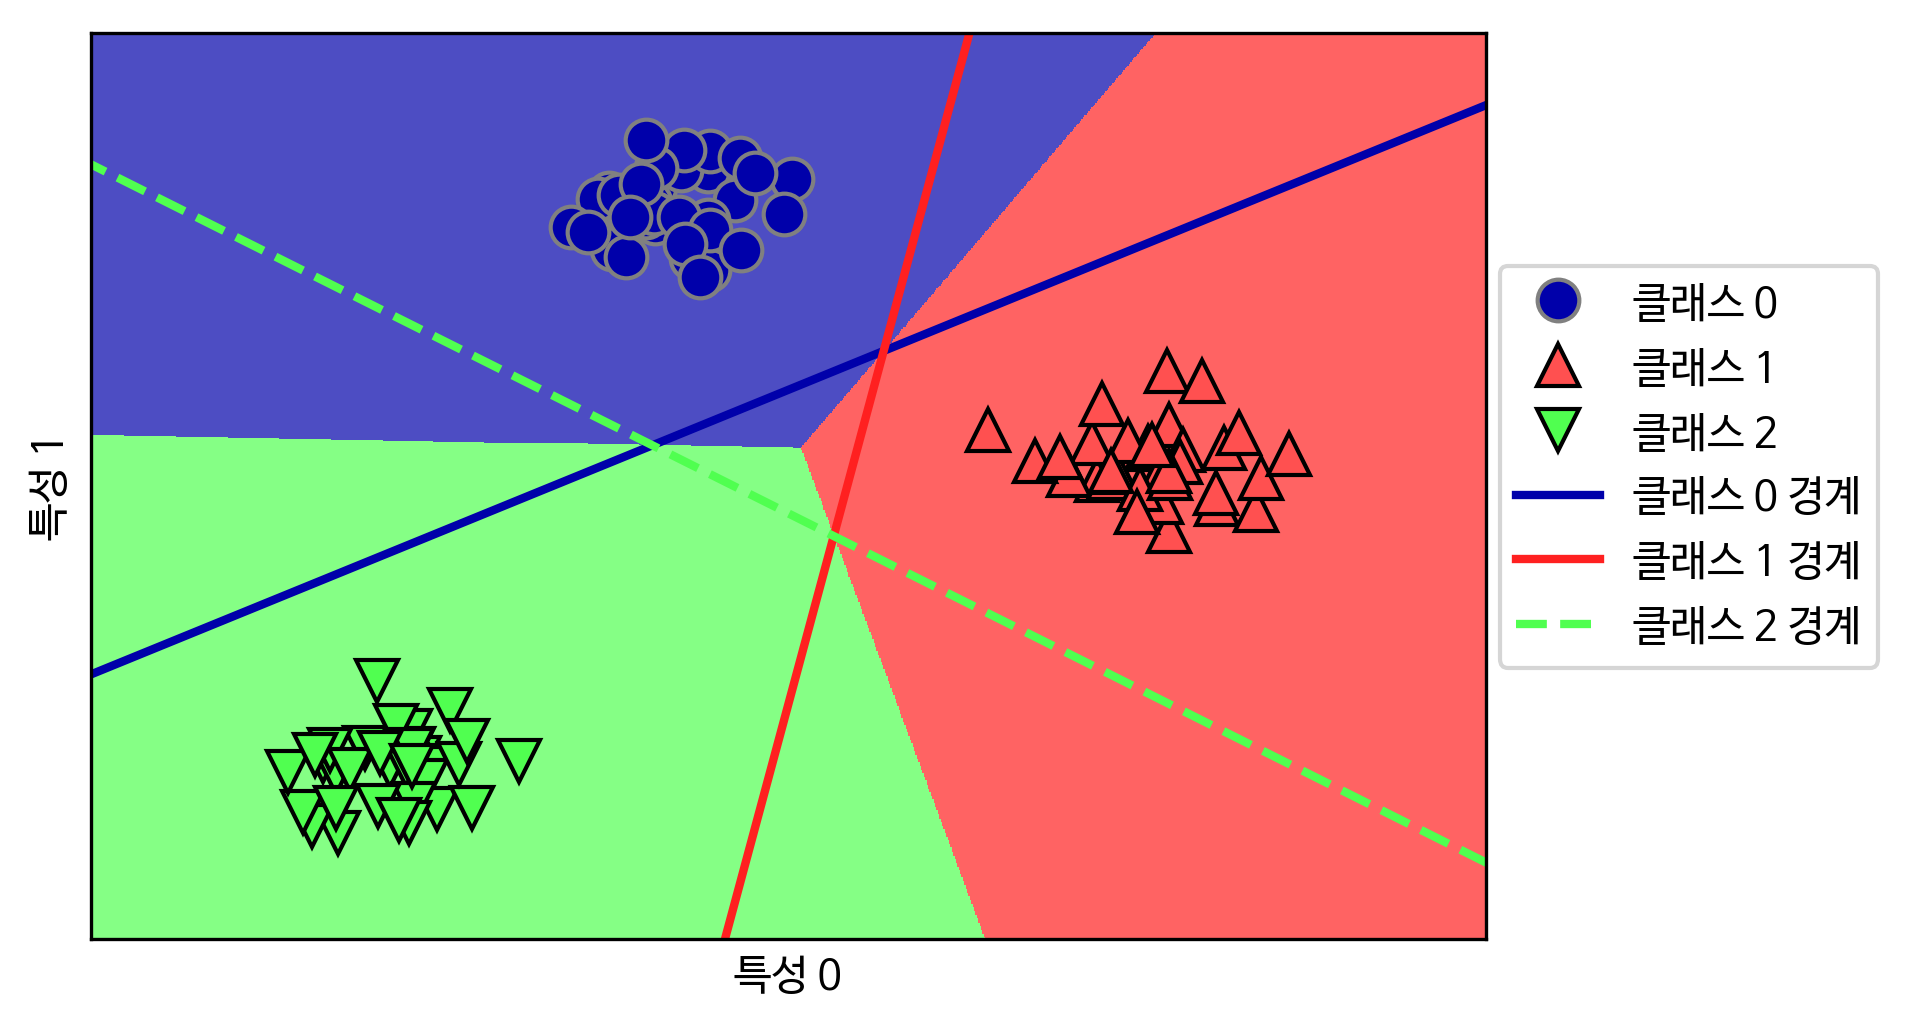

In [66]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 하이퍼 파라미터 선정
- 규제화는 알파가 클수로, C가 작을수록 커진다. 일반화에 가깝게 된다
- 이 값은 보통 로그 스케일로 변경해 본다
- 특성의 수를 줄이고 싶으면 L1 규제를 가한다

### 메서드 연결
- 같은 타입의 객체를 리턴하는 메소드에서는 예를 들어 모델의 객체 생성, 학습, 예측을 한번에 실행하는 것이 가능하다

1) logreg = LogisticRegression().fit(X_train, y_train)

2) logreg = LogisticRegression()

y_pred = logreg.fit(X_train, y_train).predict(X_test)

3) y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)